<a href="https://colab.research.google.com/github/HarshGujarathi7/GISTEST/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center">Research Interest</h1>

In this project, my focus centered on exploring the intricate relationship between crime rates, income levels, and drug usage across various states in India. Delving further into the analysis, I honed in on district-level details for two specific states: Goa and Chhattisgarh. The decision to zoom into these regions was guided by the intriguing patterns uncovered in my correlation study.

To visually represent the insights gained, I leveraged geo-plotting techniques. Notably, I mapped the locations of drug rehabilitation centers, tourist attractions, mineral-rich zones, and police stations. This approach not only facilitated a comprehensive understanding of the spatial dynamics but also provided a holistic view of the socio-economic and law enforcement landscape within the chosen states.

The integration of geographical data added a layer of depth to the project, enabling a nuanced exploration of the intersections between crime, income, and drug usage at both state and district levels. This multi-faceted analysis contributes to a more nuanced comprehension of the complex dynamics at play in these regions.

aok: cool great topic; do make sure though data are decently representative of the districs; think about quality of the data and margins of error; and ideally see if can traingulate--use multiple measures to measure the same concept:

https://researchmethod.net/triangulation/

https://conjointly.com/kb/measurement-error/

## <center style="text-align:center;background-color: #D7E6AC"><u>Data Sets</u></center>


Data i used have been taken online from various sites .


*   This data set is for the income and wealth of each district-https://secc.in/getSeccDataSummaryNationalReport.htmgov.

* This dataset contains the crime statistics of the districts of India - https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012

*   Tourism Staistics- https://tourism.gov.in/sites/default/files/2022-09/India%20Tourism%20Statistics%202022%20%28English%29.pdf

* Rehab Centers in India - https://www.unodc.org/pdf/india/publications/dams_Monograph/09_results.pdf

*   Tourist places - https://www.kaggle.com/datasets/naqibahmedkadri/famous-indian-tourist-places

*   police Staions-https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::india-police-station-locations-2023/explore









## <center style="text-align:center;background-color: #D7E6AC"><u>Importing Libraries</u></center>

In [1]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import data_table
data_table.enable_dataframe_formatter()
!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import fuzz
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
!pip install mapclassify
import mapclassify

## <center style="text-align:center;background-color: #D7E6AC"><u>Install Geopandas</u></center>

In [3]:
import geopandas as gpd

## <center style="text-align:center;background-color: #D7E6AC"><u>Mapping Shapefile</u></center>

In this we are mapping the shapefile of India .

*   We have provided the link of the zip file which is present in my repository and we are Plotting it
*   In the code we first find the zip file , then unzip the zip file and find the shape file of india ,then we plot the india shapefile







In [4]:

! wget -q -O India_State_Shapefile.zip https://github.com/HarshGujarathi7/files/raw/main/India_State_Shapefile.zip
zip_ref = zipfile.ZipFile('India_State_Shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close()
india=gpd.read_file("India_State_Shapefile/India_State_Boundary.shp")

<Axes: >

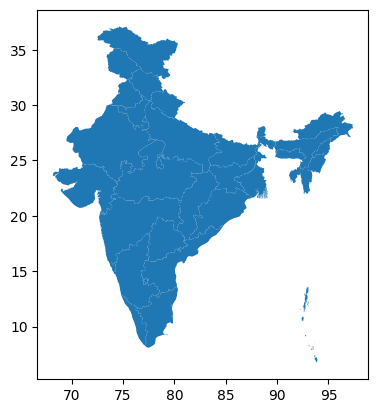

In [5]:
#make the map
india.plot()

The above map plots the district and India map borders

## **Data Types and columns in the shapefile**

In [6]:
india.dtypes


Name          object
Type          object
geometry    geometry
dtype: object

In [7]:
india.columns

Index(['Name', 'Type', 'geometry'], dtype='object')

In [8]:
india['Name'] = india['Name'].str.upper()
india.rename(columns= { 'Name':'STATE'}, inplace=True)

In [9]:
india.describe

<bound method NDFrame.describe of                                        STATE             Type  \
0                                WEST BENGAL            State   
1                          ANDAMAN & NICOBAR  Union Territory   
2                                 CHANDIGARH  Union Territory   
3   DAMAN AND DIU AND DADRA AND NAGAR HAVELI  Union Territory   
4                                      DELHI  Union Territory   
5                                    HARYANA            State   
6                                  JHARKHAND            State   
7                                  KARNATAKA            State   
8                                     KERALA            State   
9                                LAKSHADWEEP  Union Territory   
10                            MADHYA PRADESH            State   
11                               MAHARASHTRA            State   
12                                PUDUCHERRY  Union Territory   
13                                 TAMILNADU            

In [10]:
! wget -q -O India_district_Shapefile.zip https://github.com/HarshGujarathi7/GISTEST/raw/main/district.zip
zip_ref = zipfile.ZipFile('India_district_Shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close()
districts=gpd.read_file("output.shp")

In [11]:
districts.columns.values

array(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry'], dtype=object)

<Axes: >

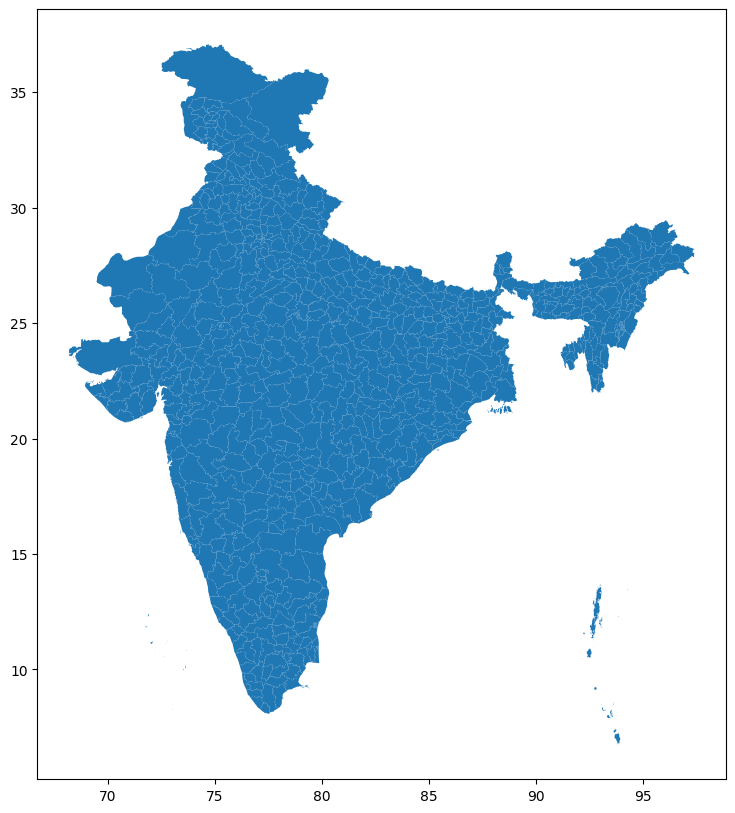

In [12]:
districts.plot(figsize=(10,10))

In [13]:
districts.isna().sum()

objectid       0
statecode      0
statename      0
state_ut       0
distcode       0
distname       0
distarea      64
totalpopul    33
totalhh       33
totpopmale    33
totpopfema    33
st_areasha     0
st_lengths     0
geometry       0
dtype: int64

## Blank values are quantitative so filling out the values using mean

In [14]:
districts['distarea'].fillna(districts['distarea'].mean(),inplace=True)
districts['totalpopul'].fillna(districts['totalpopul'].mean(),inplace=True)
districts['totalhh'].fillna(districts['totalhh'].mean(),inplace=True)
districts['totpopmale'].fillna(districts['totpopmale'].mean(),inplace=True)
districts['totpopfema'].fillna(districts['totpopfema'].mean(),inplace=True)

In [15]:
states = districts.dissolve(by='statename',aggfunc='sum').reset_index()

<ipython-input-15-07cf2f2716b8>:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  states = districts.dissolve(by='statename',aggfunc='sum').reset_index()


In [16]:
States =states[["statename","totalpopul","geometry"]]
States['statename'] = States['statename'].str.upper()
States.rename(columns= { 'statename':'STATE'}, inplace=True)
States['population'] = States['totalpopul'] / 100

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-16-78a672c56440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  States.rename(columns= { 'statename':'STATE'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [17]:
States.columns

Index(['STATE', 'totalpopul', 'geometry', 'population'], dtype='object')

##  Graph Description
The  Map below despicts the total population of each State in different colors.
Dark Grey color shows highest population followed by red , orange , yellow and light yellow .
West side of India in states like Maharashtra and North India -Uttar Pradesh ,Bihar has the highest population as per the graph

<Axes: >

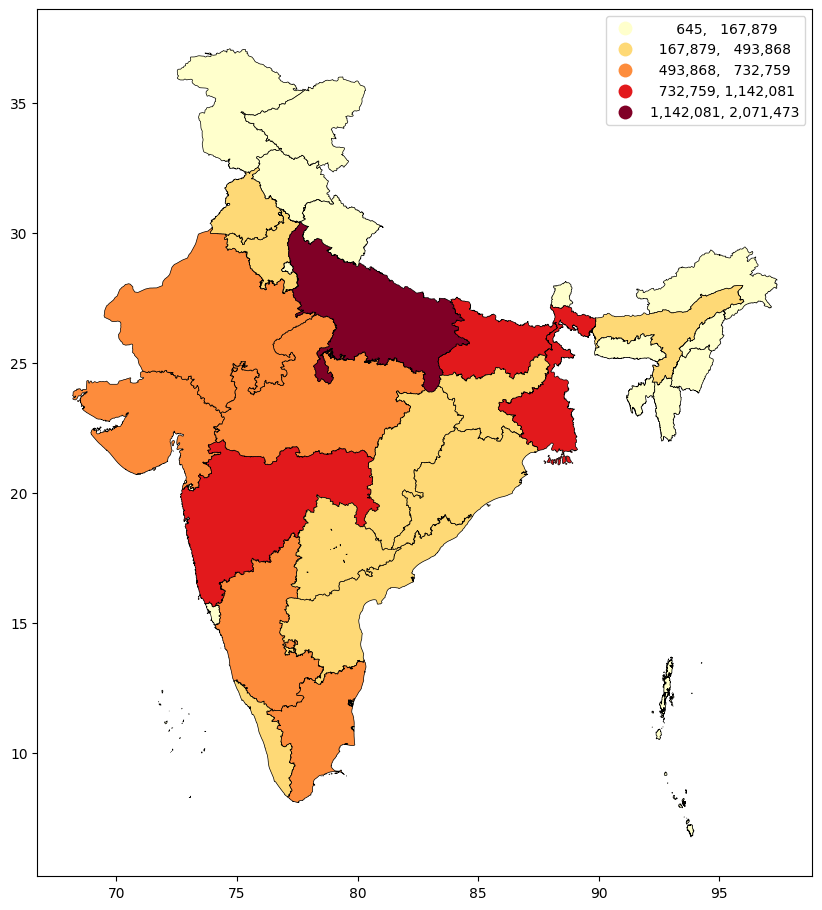

In [18]:
States.plot(figsize=(10,12),column='population',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

In [19]:
states.describe()

,objectid,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths
count,37.000000,37.000000,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
mean,6499.216216,90759.118850,3.434549e+07,7.077040e+06,1.767921e+07,1.666628e+07,1.068991e+11,9.456468e+06
std,8784.601212,97615.334170,4.367413e+07,8.391795e+06,2.268012e+07,2.100191e+07,1.128213e+11,9.047540e+06
min,75.000000,30.000000,6.447300e+04,1.157400e+04,3.312300e+04,3.135000e+04,1.548992e+08,8.160654e+04
25%,826.000000,16579.000000,1.383727e+06,3.024500e+05,7.139120e+05,6.698150e+05,1.235412e+10,3.078406e+06
50%,3463.000000,55673.000000,1.678794e+07,3.435999e+06,8.987326e+06,7.800615e+06,7.762950e+10,7.591459e+06
75%,8564.000000,150217.473768,4.938680e+07,1.266476e+07,2.473807e+07,2.464873e+07,1.565270e+11,1.356952e+07
max,45371.000000,342239.000000,2.071473e+08,3.495944e+07,1.082562e+08,9.889115e+07,4.299271e+11,3.381061e+07


In [20]:
crime= pd.read_excel ('https://github.com/HarshGujarathi7/GISTEST/raw/main/District_wise_IPC_crime_reported_INDIA_2001-2012.xlsx')
crime.head(3)

,STATE,DISTRICT,THEFT,RIOTS,DACOITY,DOWRY DEATHS,RAPE,MURDER,KIDNAPPING AND ABDUCTION,ROBBERY,ASSAULT ON WOMEN,TOTAL CRIMES
0,ANDHRA PRADESH,ADILABAD,3964,1016,72,188,672,1186,754,237,1785,61959
1,ANDHRA PRADESH,ANANTAPUR,6079,1293,137,174,266,1922,839,244,2026,59927
2,ANDHRA PRADESH,CHITTOOR,11077,973,96,262,368,1270,907,207,1381,75471


In [21]:
crime1 = crime.groupby('STATE')['TOTAL  CRIMES'].sum().reset_index()

In [22]:
crime.isnull().sum()

STATE                       0
DISTRICT                    0
THEFT                       0
RIOTS                       0
DACOITY                     0
DOWRY DEATHS                0
RAPE                        0
MURDER                      0
KIDNAPPING AND ABDUCTION    0
ROBBERY                     0
ASSAULT ON WOMEN            0
TOTAL  CRIMES               0
dtype: int64

In [23]:
crime1.loc[crime1['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
crime1.loc[crime1['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
crime1.loc[crime1['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
crime1.loc[crime1['STATE'] == 'DELHI UT', 'STATE'] = 'DELHI'
crime1.loc[crime1['STATE'] == 'A & N ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'

In [24]:
filtered_df = crime1[crime1['STATE'].isin(['CHHATTISHGARH', 'ANDHRA PRADESH', 'KARNATAKA'])]
filtered_df1 = crime1[crime1['STATE'].isin(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH'])]

mean_total_crimes = filtered_df['TOTAL  CRIMES'].mean()
mean_total_crimes1 = filtered_df1['TOTAL  CRIMES'].mean()
print(mean_total_crimes1)
print(mean_total_crimes)

685740.0
1876811.6666666667


In [25]:
new_row = {'STATE': 'DAMAN AND DIU AND DADRA AND NAGAR HAVELI', 'TOTAL  CRIMES': 287461}
crime1=crime1.append(new_row, ignore_index=True)
new_row1 = {'STATE': 'TELENGANA', 'TOTAL  CRIMES': 1876811.6}
crime1=crime1.append(new_row1, ignore_index=True)
new_row2 = {'STATE': 'LADAKH', 'TOTAL  CRIMES': 685740.0}
crime1=crime1.append(new_row2, ignore_index=True)

<ipython-input-25-2721ee00f817>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row, ignore_index=True)
<ipython-input-25-2721ee00f817>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row1, ignore_index=True)
<ipython-input-25-2721ee00f817>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row2, ignore_index=True)


In [26]:
crime1 = crime1[~crime1['STATE'].isin(['D & N HAVELI', 'DAMAN & DIU'])]

crime1.reset_index(drop=True, inplace=True)

In [27]:
#crime1.rename(columns= {'STATE':'statename'}, inplace=True)

In [28]:
crime1.head(40)

,STATE,TOTAL CRIMES
0,ANDAMAN & NICOBAR,161152.0
1,ANDHRA PRADESH,2233216.0
2,ARUNACHAL PRADESH,1833018.0
3,ASSAM,577157.0
4,BIHAR,1986383.0
5,CHANDIGARH,53853.0
6,CHHATTISHGARH,1756478.0
7,DELHI,926485.0
8,GOA,74209.0
9,GUJARAT,1966276.0


In [29]:
different_states = set(india['STATE']) ^ set(crime1['STATE'])
print(different_states)

set()


In [30]:
C1 = pd.merge(india, crime1, on='STATE',how='outer',indicator=True)
C2 = pd.merge(india, crime1, on='STATE',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 131.9044079833447, 'source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012')

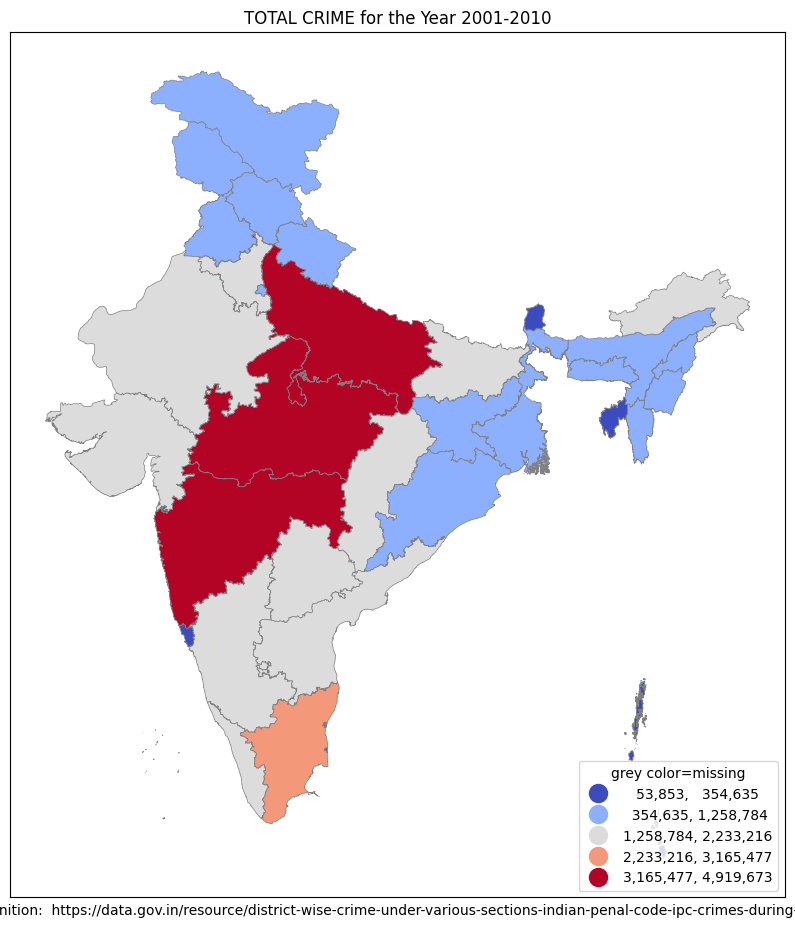

In [31]:
fig, ax = plt.subplots(1, figsize=(10,12))
C1.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("TOTAL CRIME for the Year 2001-2010")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012''')


## Above Map Description

The above graph shows the State wise THEFT Crimes in India .
As you can see from the map red color denotes highest crime while dark green depicts low amount of theft crime


*   Highest crime- UTTAR PRADESH - 53853.0
*   Least crime - CHANDIGARH- 4919673.0



## Finding the Max and least Theft Count



In [32]:
min_theft_index = crime1['TOTAL  CRIMES'].idxmin()
max_theft_index = crime1['TOTAL  CRIMES'].idxmax()


State_with_min_theft = crime1.loc[min_theft_index, 'STATE']
min_theft_value = crime1.loc[min_theft_index, 'TOTAL  CRIMES']
State_with_max_theft = crime1.loc[max_theft_index, 'STATE']
max_theft_value = crime1.loc[max_theft_index, 'TOTAL  CRIMES']

print("State with minimum theft:", State_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("State with Max theft:", State_with_max_theft)
print("Max theft value:", max_theft_value)

State with minimum theft: CHANDIGARH
Minimum theft value: 53853.0
State with Max theft: UTTAR PRADESH
Max theft value: 4919673.0


In [33]:
States.loc[States['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
States.loc[States['STATE'] == 'CHHATISGARH', 'STATE'] = 'CHHATTISHGARH'
States.loc[States['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
States.loc[States['STATE'] == 'NCT OF DELHI', 'STATE'] = 'DELHI'
States.loc[States['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
States.loc[States['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
States.loc[States['STATE'] == 'PONDICHERRY', 'STATE'] = 'PUDUCHERRY'
States.loc[States['STATE'] == 'ORISSA', 'STATE'] = 'ODISHA'

In [34]:
crime_pop = pd.merge(States, crime1, on='STATE',how='outer',indicator=True)

In [35]:
crime_pop["crime_popu"] = (crime1["TOTAL  CRIMES"] /States["population"])

<Axes: >

[]

[]

Text(0.5, 131.26789372431656, 'source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012')

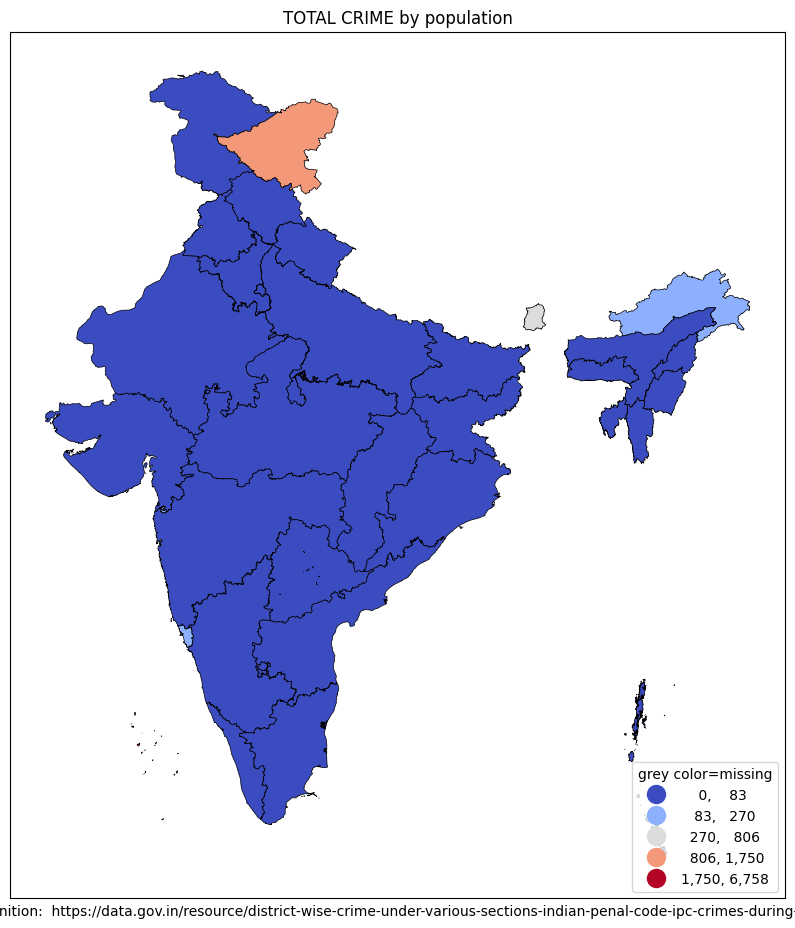

In [36]:
fig, ax = plt.subplots(1, figsize=(10,12))
crime_pop.plot(ax=ax,column='crime_popu',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("TOTAL CRIME by population")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012''')


## Map 2

In [37]:
income= pd.read_excel ('https://github.com/HarshGujarathi7/files/raw/main/india_states_income.xlsx')
income.rename(columns= {'state' : 'STATE'}, inplace=True)
income['STATE'] = income['STATE'].str.upper()
income.head(40)

,STATE,Income
0,ANDAMAN & NICOBAR ISLAND,1532470.000
1,ANDHRA PRADESH,1076033.000
2,ARUNACHAL PRADESH,1066310.000
3,ASSAM,623326.000
4,BIHAR,310196.000
5,CHANDIGARH,2524879.000
6,CHHATTISGARH,772529.000
7,DELHI,2747424.904
8,GOA,3173736.000
9,GUJARAT,1467046.000


In [38]:
income1 = pd.read_excel ('https://github.com/HarshGujarathi7/files/raw/main/states_income.xlsx')
income1.rename(columns= {'state' : 'STATE'}, inplace=True)
income1['STATE'] = income1['STATE'].str.upper()
income1.loc[income1['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
income1.loc[income1['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
income1.loc[income1['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
income1.loc[income1['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
income1.loc[income1['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
income1.head(20)

,STATE,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,income,2021,2022,CATEGORY
0,ANDAMAN & NICOBAR ISLAND,2580.0,2302.0,2884.0,15192.0,16191.0,15354.0,15896.0,16350.0,14502.0,...,98735,106711,114660,129532,145562,154233.000,161564,NaN,NaN,Per Capita Income
1,ANDHRA PRADESH,2060.0,2134.0,2039.0,7416.0,7711.0,8071.0,8514.0,8191.0,9144.0,...,72254,79174,88609,94115,103177,108853.000,115344,114324.0,126587.0,Per Capita Income
2,ARUNACHAL PRADESH,2709.0,3013.0,3015.0,8733.0,8342.0,9352.0,8590.0,8634.0,8712.0,...,79004,91034,88768,91319,94008,99580.000,113110,108706.0,NaN,Per Capita Income
3,ASSAM,1544.0,1575.0,1557.0,5715.0,5737.0,5760.0,5793.0,5796.0,5664.0,...,43002,44809,50642,53575,57835,59943.000,61519,57227.0,NaN,Per Capita Income
4,BIHAR,1197.0,1105.0,1017.0,3037.0,3306.0,2728.0,3338.0,3100.0,3210.0,...,22776,23223,24064,25455,26719,29092.000,29794,28127.0,30779.0,Per Capita Income
5,CHANDIGARH,NaN,NaN,NaN,19761.0,21021.0,22524.0,24855.0,25470.0,26718.0,...,180615,182867,195205,208231,218201,227231.000,234350,203180.0,NaN,Per Capita Income
6,CHHATTISHGARH,NaN,NaN,NaN,6539.0,6445.0,6474.0,6654.0,6810.0,6873.0,...,61409,61122,61433,67139,68374,72537.000,75278,72236.0,NaN,Per Capita Income
7,DELHI,5447.0,6046.0,6042.0,18166.0,19575.0,19162.0,20983.0,23482.0,23762.0,...,200702,213669,233115,244255,252960,257596.904,260541,243110.0,263477.0,Per Capita Income
8,GOA,4883.0,4786.0,5381.0,16558.0,16977.0,17929.0,20686.0,20595.0,25364.0,...,188358,241081,278601,305875,308296,308753.000,313973,298527.0,NaN,Per Capita Income
9,GUJARAT,2641.0,2381.0,3091.0,9796.0,11535.0,11649.0,13206.0,13018.0,13735.0,...,102589,111370,120683,129738,143604,154887.000,164060,160321.0,NaN,Per Capita Income


In [39]:
income.loc[income['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
income.loc[income['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
income.loc[income['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
income.loc[income['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
income.loc[income['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
income.head(40)


,STATE,Income
0,ANDAMAN & NICOBAR ISLAND,1532470.000
1,ANDHRA PRADESH,1076033.000
2,ARUNACHAL PRADESH,1066310.000
3,ASSAM,623326.000
4,BIHAR,310196.000
5,CHANDIGARH,2524879.000
6,CHHATTISHGARH,772529.000
7,DELHI,2747424.904
8,GOA,3173736.000
9,GUJARAT,1467046.000


In [40]:
different_states1 = set(States['STATE']) ^ set(income['STATE'])
print(different_states)

set()


In [41]:
inc1 = pd.merge(States, income1, on='STATE',how='outer',indicator=True)
inc1[['STATE','income','_merge']]
inc2 = pd.merge(States, income1, on='STATE',how='inner',indicator=False)

,STATE,income,_merge
0,ANDAMAN & NICOBAR,NaN,left_only
1,ANDHRA PRADESH,115344.0,both
2,ARUNACHAL PRADESH,113110.0,both
3,ASSAM,61519.0,both
4,BIHAR,29794.0,both
5,CHANDIGARH,234350.0,both
6,CHHATTISHGARH,75278.0,both
7,DADRA & NAGAR HAVELI,NaN,left_only
8,DAMAN & DIU,NaN,left_only
9,GOA,313973.0,both


<Axes: >

[]

[]

Text(0.5, 148.1851714378084, '')

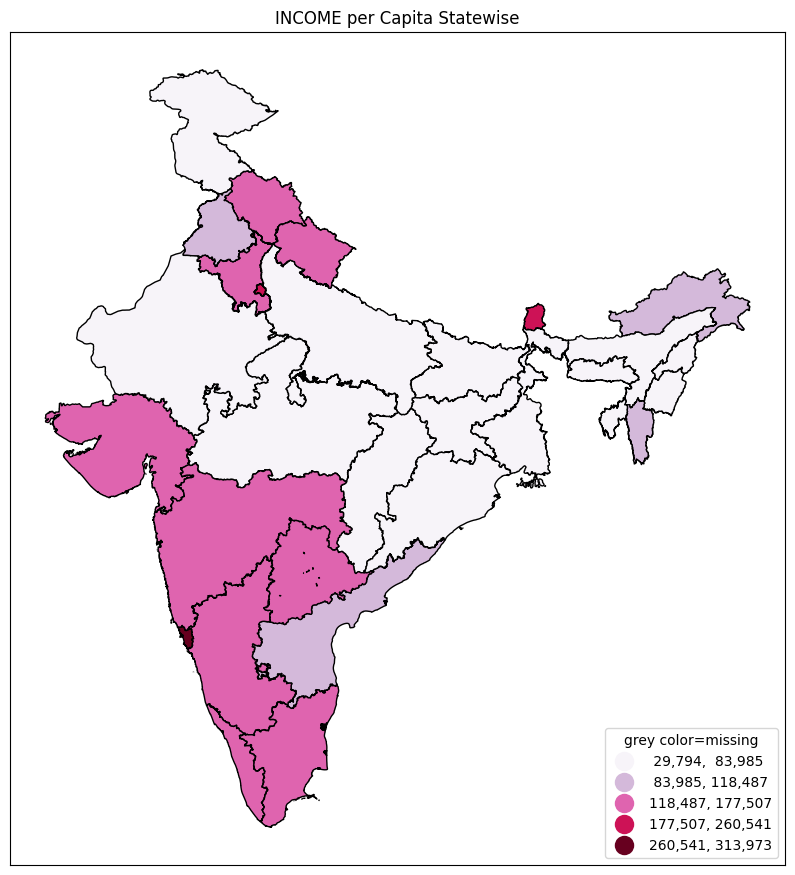

In [42]:
fig, ax = plt.subplots(1, figsize=(10,12))
inc2.plot(ax=ax,column='income',legend=True,cmap='PuRd',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=1.0,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("INCOME per Capita Statewise")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')

## Map 3 Regarding drug Consumption in India

In [43]:
alcohol = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/Alcohol.xlsx')
alcohol.columns
alcohol.head(1)


Index(['Code', 'State State/UT', 'Alcohol Current', 'Alcohol Dependence (%)',
       'Alcohol 'Quantum of Work' (%)'],
      dtype='object')

,Code,State State/UT,Alcohol Current,Alcohol Dependence (%),Alcohol 'Quantum of Work' (%)
0,1,JAMMU & KASHMIR,3.5,0.3,1.2


In [44]:
alcohol.rename(columns= {'State State/UT' : 'STATE'}, inplace=True)
alcohol['STATE'] = alcohol['STATE'].str.upper()
alcohol.rename(columns= {'Alcohol Current' : 'Usage'}, inplace=True)

In [45]:
alcohol.loc[alcohol['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
alcohol.loc[alcohol['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
alcohol.loc[alcohol['STATE'] == 'TAMILINADO', 'STATE'] = 'TAMILNADU'
alcohol.loc[alcohol['STATE'] == 'ANDAMAN & NICOBAR ISLAND', 'STATE'] = 'ANDAMAN & NICOBAR'
alcohol.loc[alcohol['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
alcohol.loc[alcohol['STATE'] == 'UTTAR PRADESHI', 'STATE'] = 'UTTAR PRADESH'

In [46]:
different_states2 = set(States['STATE']) ^ set(alcohol['STATE'])
print(different_states2)

{'LADAKH', nan, 'INDIA'}


In [47]:
drug1 = pd.merge(States, alcohol, on='STATE',how='outer',indicator=True)
drug1[['STATE','Usage','_merge']]
drug2 = pd.merge(States, alcohol, on='STATE',how='inner',indicator=False)


,STATE,Usage,_merge
0,ANDAMAN & NICOBAR,25.4,both
1,ANDHRA PRADESH,13.7,both
2,ARUNACHAL PRADESH,28.0,both
3,ASSAM,8.8,both
4,BIHAR,0.9,both
...,...,...,...
149,NaN,NaN,right_only
150,NaN,NaN,right_only
151,NaN,NaN,right_only
152,NaN,NaN,right_only


<Axes: >

[]

[]

Text(0.5, 131.26789372431656, 'source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.')

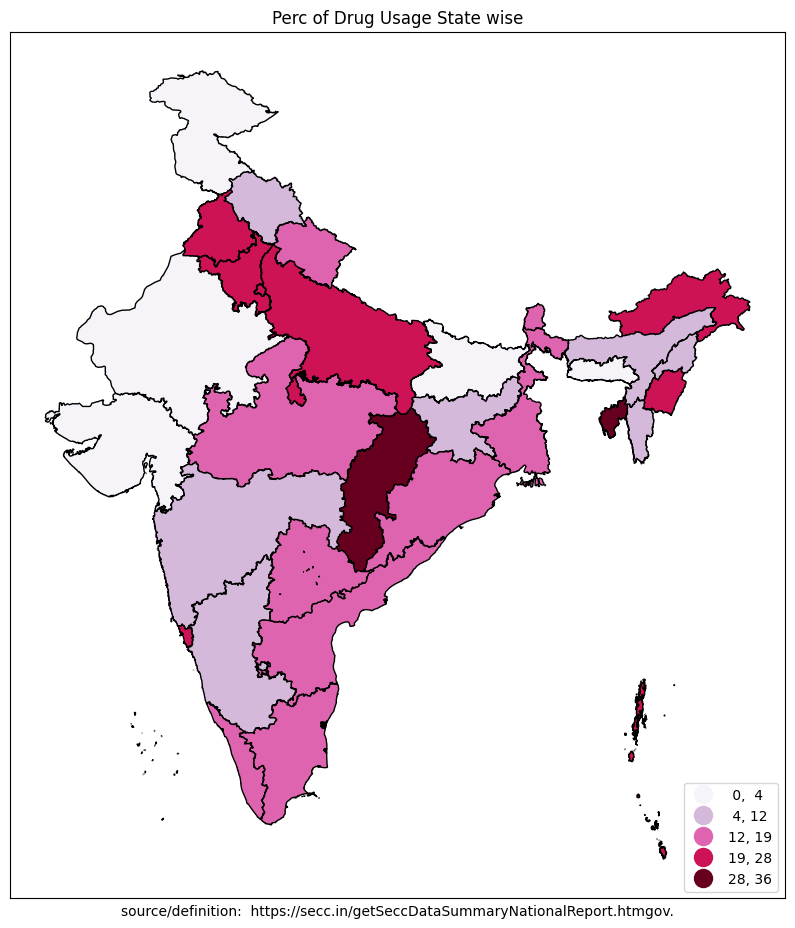

In [48]:
fig, ax = plt.subplots(1, figsize=(10,12))
drug1.plot(ax=ax,column='Usage',legend=True,cmap='PuRd',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=1.0,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('')
ax.title.set_text("Perc of Drug Usage State wise")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.''')

## Centroid mapping of Crime ,Income and Drug Usage of each State of India

In [49]:
C1c = C1.copy()
C1c["geometry"] = C1c["geometry"].centroid

<ipython-input-49-540aec2ff744>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  C1c["geometry"] = C1c["geometry"].centroid


In [50]:
india_district_u=States.query("STATE=='UTTAR PRADESH'")
india_district_g=States.query("STATE=='GOA'")


<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Total Crime per State'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

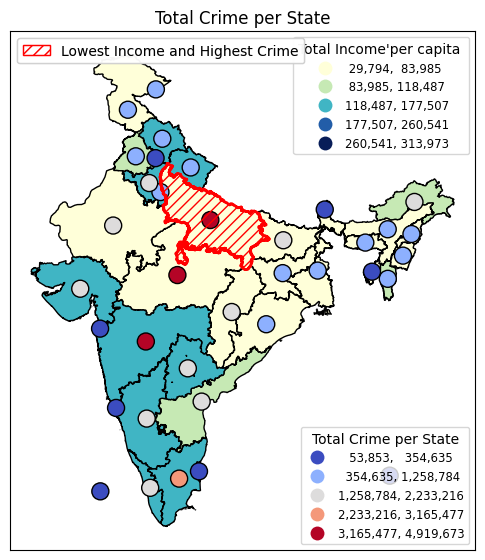

In [51]:
fig, ax = plt.subplots(1, figsize=(6,14))
inc2.plot(ax=ax,column='income',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income'per capita ''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
C1c.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Total Crime per State")

l2 = ax.get_legend()
l2.set_title('''Total Crime per State ''')

india_district_u.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Total Crime per State''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Income and Highest Crime')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Total Crime'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

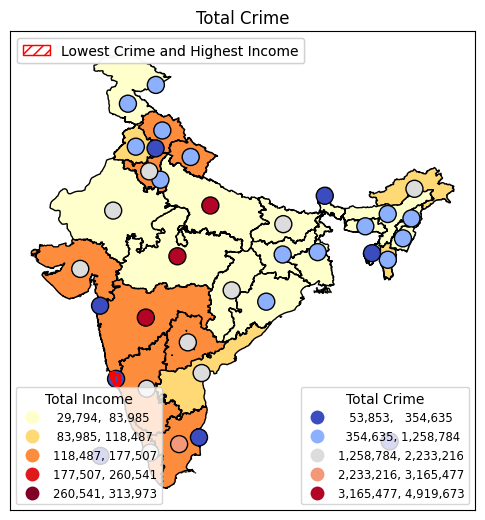

In [52]:

fig, ax = plt.subplots(1, figsize=(6,14))
inc2.plot(ax=ax,column='income',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
C1c.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Total Crime")

l2 = ax.get_legend()
l2.set_title('''Total Crime''')

india_district_g.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Total Crime''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Crime and Highest Income')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

In [53]:
D1c = drug1.copy()
D1c["geometry"] = D1c["geometry"].centroid

<ipython-input-53-e5985c0539cf>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  D1c["geometry"] = D1c["geometry"].centroid


In [54]:
india_district_ct=States.query("STATE=='CHHATTISHGARH'|STATE=='TRIPURA'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Drug Usage Perc'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

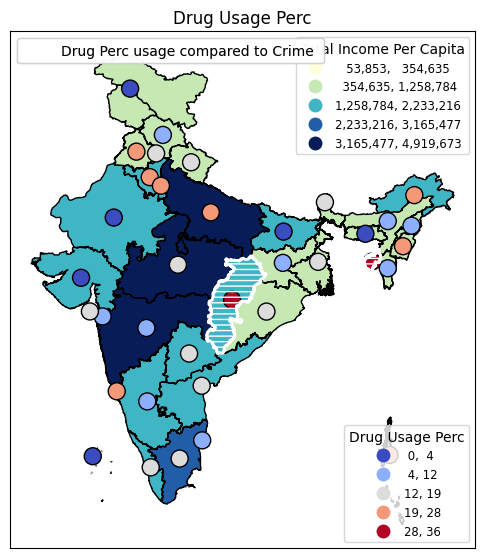

In [55]:
fig, ax = plt.subplots(1, figsize=(6,14))
C1.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income Per Capita''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
D1c.plot(ax=ax,column='Usage',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Drug Usage Perc")

l2 = ax.get_legend()
l2.set_title('''Drug Usage Perc''')

india_district_ct.plot(ax=ax,edgecolor='white',linewidth=2, facecolor="none",alpha=1,hatch='---')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Drug Usage Perc''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='white', facecolor='none',
                     hatch='---', label=r'Drug Perc usage compared to Crime ')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

## HISTOGRAM OF OPIOIDS ABUSE PERC IN INDIA

In [56]:
opioids = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/Opioids.xlsx')
opioids.columns

Index(['Code', 'State State/UT', 'Opioids Current Use (%)',
       'Opioids Dependence (%)', 'Opioids 'Quantum of Work' (%)'],
      dtype='object')

In [57]:
opioids.rename(columns= {'State State/UT' : 'STATE'}, inplace=True)
opioids['STATE'] = opioids['STATE'].str.upper()
opioids.rename(columns= {'Opioids Current Use (%)' : 'opioid_usage_perc'}, inplace=True)

In [58]:
opioids.loc[opioids['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
opioids.loc[opioids['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
opioids.loc[opioids['STATE'] == 'TAMILINADO', 'STATE'] = 'TAMILNADU'
opioids.loc[opioids['STATE'] == 'ANDAMAN & NICOBAR ISLAND', 'STATE'] = 'ANDAMAN & NICOBAR'
opioids.loc[opioids['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
opioids.loc[opioids['STATE'] == 'UTTAR PRADESHI', 'STATE'] = 'UTTAR PRADESH'

In [59]:
drugOP = pd.merge(States, opioids, on='STATE',how='inner',indicator=False)

(array([19.,  6.,  3.,  3.,  0.,  1.,  0.,  1.,  1.,  2.]),
 array([ 0.19 ,  2.738,  5.286,  7.834, 10.382, 12.93 , 15.478, 18.026,
        20.574, 23.122, 25.67 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Opioids perc usage')

Text(0, 0.5, 'No of States')

Text(0.5, 1.0, 'Opioids Percentage Usage by State')

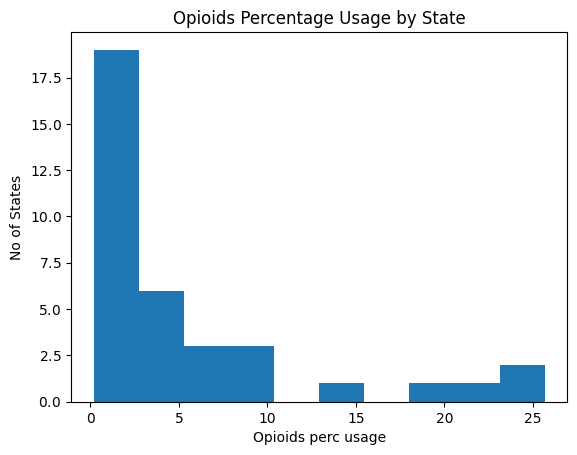

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.hist(drugOP['opioid_usage_perc'], bins=10)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

plt.xlabel('Opioids perc usage')
plt.ylabel('No of States')
plt.title('Opioids Percentage Usage by State')

plt.show()


## PIE CHART TO SHOW INCOME OF EACH STATE

In [61]:
import matplotlib.pyplot as plt


In [62]:

state_names = inc2['STATE'].tolist()
income_values = inc2['income'].tolist()


<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d9526a7bac0>,
 [Text(-0.9040585464240566, 0.6266403630772774, 'ANDHRA PRADESH'),
  Text(-1.002666733525643, 0.45239299450921805, 'ARUNACHAL PRADESH'),
  Text(-1.0557760009852213, 0.30876696025263833, 'ASSAM'),
  Text(-1.0754497568447938, 0.23110132085835014, 'BIHAR'),
  Text(-1.0999995244026979, 0.0010228948325797136, 'CHANDIGARH'),
  Text(-1.0668576184468423, -0.2679828762475911, 'CHHATTISHGARH'),
  Text(-0.933933113629157, -0.5811789219052497, 'GOA'),
  Text(-0.6505123613108345, -0.8870364523410538, 'GUJARAT'),
  Text(-0.38776300967101196, -1.0293880941272242, 'HARYANA'),
  Text(-0.11736865303619815, -1.0937205307044706, 'HIMACHAL PRADESH'),
  Text(0.06535154775738751, -1.0980569999802898, 'JAMMU AND KASHMIR'),
  Text(0.17358319990778304, -1.086217691215612, 'JHARKHAND'),
  Text(0.35355887874386993, -1.0416314699841676, 'KARNATAKA'),
  Text(0.5945153899316138, -0.9255006489108808, 'KERALA'),
  Text(0.7411572363643774, -0.8128259044744567, 'MADHYA PRA

(-1.0999999999952987,
 1.099999999902164,
 -1.0999999999875667,
 1.0999999997625676)

Text(0.5, 1.0, 'Income Distribution by State in India')

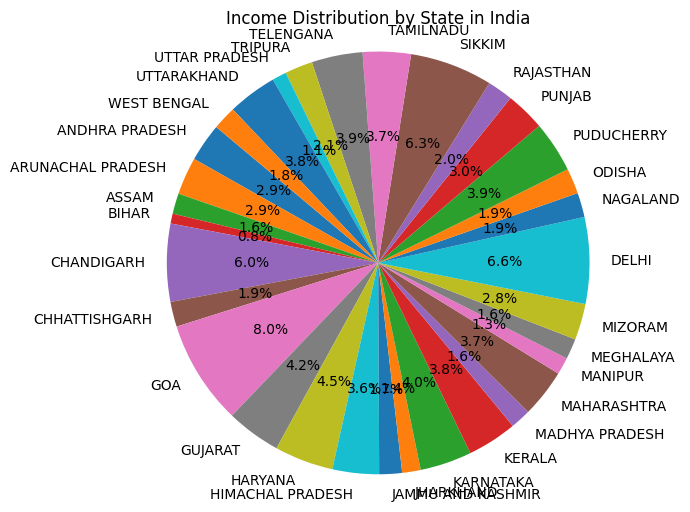

In [63]:
plt.figure(figsize=(6, 6))
plt.pie(income_values, labels=state_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Income Distribution by State in India')



## Location of Police Stations in INDIA

In [64]:
! wget -q -O police.zip https://github.com/HarshGujarathi7/files/raw/main/police_stations.zip
zip_ref = zipfile.ZipFile('police.zip', 'r'); zip_ref.extractall(); zip_ref.close()
!ls -lah
police =gpd.read_file("police_india.shp")

total 67M
drwxr-xr-x 1 root root 4.0K Nov 30 19:31 .
drwxr-xr-x 1 root root 4.0K Nov 30 19:24 ..
drwxr-xr-x 4 root root 4.0K Nov 29 20:31 .config
-rw-r--r-- 1 root root  23M Nov 30 19:30 India_district_Shapefile.zip
drwxr-xr-x 2 root root 4.0K Nov 30 19:30 India_State_Shapefile
-rw-r--r-- 1 root root  14M Nov 30 19:30 India_State_Shapefile.zip
-rw-r--r-- 1 root root    5 Nov 30 19:30 output.cpg
-rw-r--r-- 1 root root 109K Nov 30 19:30 output.dbf
-rw-r--r-- 1 root root  143 Nov 30 19:30 output.prj
-rw-r--r-- 1 root root  31M Nov 30 19:30 output.shp
-rw-r--r-- 1 root root 5.6K Nov 30 19:30 output.shx
-rw-r--r-- 1 root root 101K Nov 30 19:31 police_india.dbf
-rw-r--r-- 1 root root  143 Nov 30 19:31 police_india.prj
-rw-r--r-- 1 root root  35K Nov 30 19:31 police_india.shp
-rw-r--r-- 1 root root  11K Nov 30 19:31 police_india.shx
-rw-r--r-- 1 root root  34K Nov 30 19:31 police.zip
drwxr-xr-x 1 root root 4.0K Nov 29 20:34 sample_data


<Axes: >

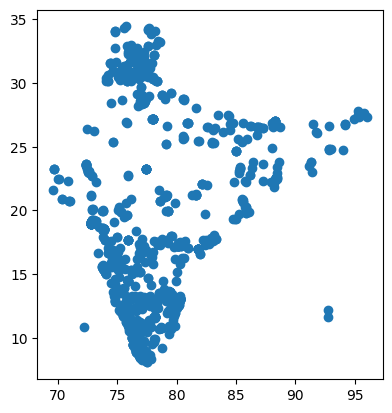

In [65]:
police.plot()

## Relationship between Crime and Police stations

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Police Stations wrt Total Crime per State')

<ipython-input-66-e6c5064108bd>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend1.legendHandles[0]._sizes = [100]


<Axes: >

Text(0.5, 1.0, 'Total Crime')

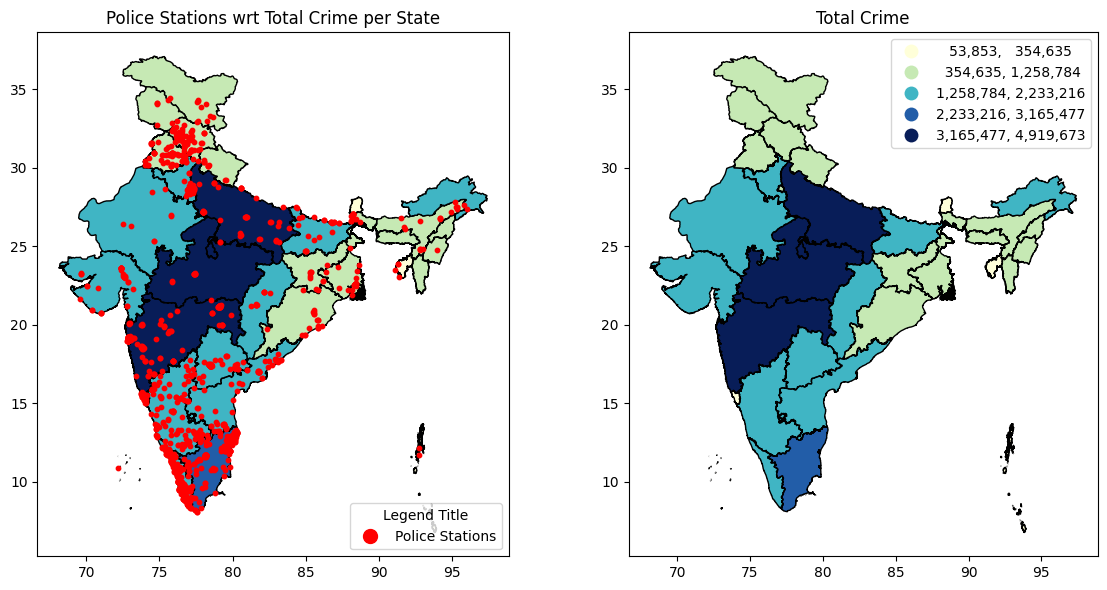

In [66]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

C1.plot(ax=ax[0], column='TOTAL  CRIMES', cmap='YlGnBu',scheme='natural_breaks', k=5, edgecolor='black', linewidth=1, legend=False)
police.plot(ax=ax[0], marker='o', color='red', markersize=10)

point = Line2D([0], [0], label='Police Stations', marker='o', markersize=10, markeredgecolor='red', markerfacecolor='red', linestyle='')
legend1 = ax[0].legend(handles=[point], loc='lower right', title='Legend Title')
ax[0].set_title("Police Stations wrt Total Crime per State")
legend1.legendHandles[0]._sizes = [100]

legend1.get_title().set_fontsize('medium')

C1.plot(ax=ax[1], column='TOTAL  CRIMES', cmap='YlGnBu', scheme='natural_breaks', k=5, edgecolor='black', linewidth=1, legend=True, legend_kwds={"fmt": "{:,.0f}"}, markersize=150)

ax[1].set_title("Total Crime")

plt.tight_layout()
plt.show()


## Plotting Police per lakh and per square km for each state

In [67]:
police_per_lakh = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/police%20per%20lakh%20states.xlsx')
police_per_lakh.columns

Index(['Sl.No.', 'States / UTs.', 'Civil Police per lakh of Population',
       'Total Police per lakh of Population',
       'Civil Police per 100 Sq. Km. of\nArea',
       'Total Police per 100 Sq. Km. of Area'],
      dtype='object')

In [68]:
police_per_lakh.rename(columns= {'States / UTs.' : 'STATE'}, inplace=True)
police_per_lakh['STATE'] = police_per_lakh['STATE'].str.upper()
police_per_lakh

,Sl.No.,STATE,Civil Police per lakh of Population,Total Police per lakh of Population,Civil Police per 100 Sq. Km. of\nArea,Total Police per 100 Sq. Km. of Area
0,1,ANDHRA PRADESH,102.66,122.63,30.86,36.86
1,2,ARUNACHAL PRADESH,273.95,568.82,3.95,8.21
2,3,ASSAM,57.23,207.90,22.03,80.03
3,4,BIHAR,49.99,63.38,50.26,63.72
4,5,CHHATISGARH,95.74,138.16,16.90,24.39
5,6,GOA,239.25,279.17,107.02,124.88
6,7,GUJARAT,77.87,99.91,22.59,28.98
7,8,HARYANA,168.76,193.72,91.53,105.06
8,9,HIMACHAL PRADESH,148.90,198.56,17.61,23.49
9,10,JAMMU & KASHMIR,476.77,656.20,59.28,81.59


In [69]:
filtered_police_df = police_per_lakh[police_per_lakh['STATE'].isin(['CHHATTISHGARH', 'ANDHRA PRADESH', 'KARNATAKA'])]

mean_total_police = filtered_police_df['Total Police per lakh of Population'].mean()
print(mean_total_police)

128.27499999999998


In [70]:
new_row1 = {'STATE': 'TELENGANA', 'Total Police per 100 Sq. Km. of Area': 38.595,'Total Police per lakh of Population':128.27}
police_per_lakh=police_per_lakh.append(new_row1, ignore_index=True)
police_per_lakh

<ipython-input-70-93e08deedffd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  police_per_lakh=police_per_lakh.append(new_row1, ignore_index=True)


,Sl.No.,STATE,Civil Police per lakh of Population,Total Police per lakh of Population,Civil Police per 100 Sq. Km. of\nArea,Total Police per 100 Sq. Km. of Area
0,1.0,ANDHRA PRADESH,102.66,122.63,30.86,36.860
1,2.0,ARUNACHAL PRADESH,273.95,568.82,3.95,8.210
2,3.0,ASSAM,57.23,207.90,22.03,80.030
3,4.0,BIHAR,49.99,63.38,50.26,63.720
4,5.0,CHHATISGARH,95.74,138.16,16.90,24.390
5,6.0,GOA,239.25,279.17,107.02,124.880
6,7.0,GUJARAT,77.87,99.91,22.59,28.980
7,8.0,HARYANA,168.76,193.72,91.53,105.060
8,9.0,HIMACHAL PRADESH,148.90,198.56,17.61,23.490
9,10.0,JAMMU & KASHMIR,476.77,656.20,59.28,81.590


In [71]:
police_per_lakh.loc[police_per_lakh['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
police_per_lakh.loc[police_per_lakh['STATE'] == 'CHHATISGARH', 'STATE'] = 'CHHATTISHGARH'
police_per_lakh.loc[police_per_lakh['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
police_per_lakh.loc[police_per_lakh['STATE'] == 'A&N ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
police_per_lakh.loc[police_per_lakh['STATE'] == 'ORISSA', 'STATE'] = 'ODISHA'

In [72]:
police_per_lakh_df = pd.merge(States, police_per_lakh ,on='STATE',how='outer',indicator=True)
police_per_lakh_df.columns

Index(['STATE', 'totalpopul', 'geometry', 'population', 'Sl.No.',
       'Civil Police per lakh of Population',
       'Total Police per lakh of Population',
       'Civil Police per 100 Sq. Km. of\nArea',
       'Total Police per 100 Sq. Km. of Area', '_merge'],
      dtype='object')

<Axes: >

Text(0.5, 1.0, 'Total Police per lakh of Population')

[]

[]

Text(0.5, 357.944868821973, '')

<Axes: >

Text(0.5, 1.0, 'Total Police per 100 Sq. Km. of Area')

[]

[]

Text(0.5, 357.9448688219729, '')

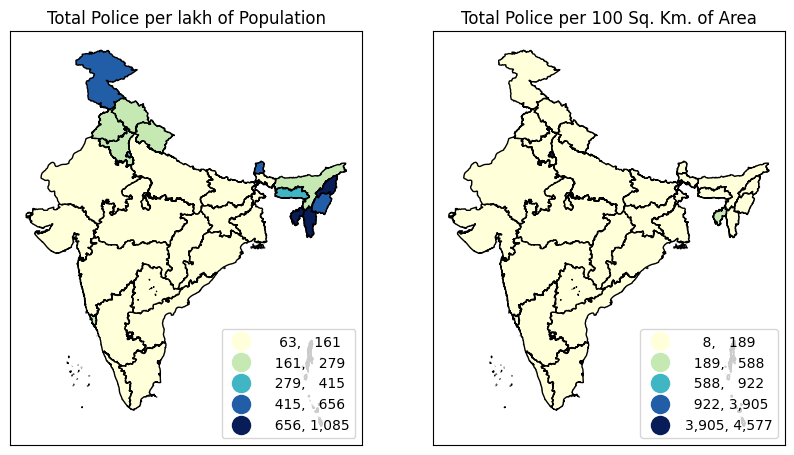

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12))


police_per_lakh_df.plot(ax=ax1, column='Total Police per lakh of Population', legend=True, cmap='YlGnBu',
                        scheme='natural_breaks', k=5, edgecolor='black', linewidth=1.0,
                        legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax1.get_legend()
leg1.set_title('')
ax1.set_title('Total Police per lakh of Population')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('')


police_per_lakh_df.plot(ax=ax2, column='Total Police per 100 Sq. Km. of Area', legend=True, cmap='YlGnBu',
                        scheme='natural_breaks', k=5, edgecolor='black', linewidth=1.0,
                        legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg2 = ax2.get_legend()
leg2.set_title('')
ax2.set_title('Total Police per 100 Sq. Km. of Area')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('')



## FOLIUM

##### Please uncomment all the cells to see the folium graphs.Shortcut key- ctrl+ A then ctrl + /

In [74]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='blah@gmail.com')


import folium as f
from folium.plugins import MarkerCluster, HeatMap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [75]:
!pip install mapclassify
import mapclassify

In [76]:
ind_tourists = pd.read_csv('https://github.com/HarshGujarathi7/files/raw/main/393118_1699398685_146467.csv')
ind_tourists.columns
ind_tourists.head(2)

<ipython-input-76-f5f0863433f2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  ind_tourists = pd.read_csv('https://github.com/HarshGujarathi7/files/raw/main/393118_1699398685_146467.csv')


Index(['poi_name', 'brand', 'poi_tel', 'main_category', 'second_category',
       'location_id', 'area_id', 'small_area_id', 'latitude', 'longitude',
       'adr', 'city', 'neighborhood', 'prov', 'postal', 'country',
       'formatted_address', 'source_url', 'email', 'opening_hours',
       'crawl_time'],
      dtype='object')

,poi_name,brand,poi_tel,main_category,second_category,location_id,area_id,small_area_id,latitude,longitude,...,city,neighborhood,prov,postal,country,formatted_address,source_url,email,opening_hours,crawl_time
0,Chirebhat Beach,NaN,NaN,Tourist Attraction,NaN,8341358915619,702053,834135891,19.8116,72.7413,...,Vijay Colony,NaN,Maharashtra,401504,India,"B-2, Vijay Colony, Maharashtra 401504, India",NaN,NaN,NaN,2022-10-01 18:05:41
1,Bekal Beach Park,NaN,NaN,Tourist attraction,Park,4854426010430,408574,485442601,12.3886,75.0408,...,Pallikere,NaN,Kerala,671316,IN,"Bekal Beach Park, Pallikere, Kerala 671316, India",NaN,NaN,"Mo,Tu,We,Th,Fr,Sa,Su 8 a.m.–10 p.m.",2023-01-18 18:35:48


In [77]:
filtered_ind_tourist_df = ind_tourists[ind_tourists['main_category'] == 'Tourist Attraction']
filtered_ind_tourist_df.shape


(12893, 21)

In [78]:
subset_ind_tourist_df = filtered_ind_tourist_df.sample(n=2000, random_state=42)
subset_ind_tourist_df.shape

(2000, 21)

In [79]:

# from folium.plugins import HeatMap
# from geopy.geocoders import Nominatim

# income_copy_df = income1.copy()
# geolocator = Nominatim(user_agent='blah@gmail.com')
# income_copy_df['location'] = income_copy_df['STATE'].apply(lambda x: geolocator.geocode(x))
# income_copy_df[['latitude', 'longitude']] = pd.DataFrame(income_copy_df['location'].apply(lambda x: (x.latitude, x.longitude) if x else (None, None)).tolist())
# m = folium.Map(location=[income_copy_df['latitude'].mean(), income_copy_df['longitude'].mean()], zoom_start=4)
# HeatMap(income_copy_df[['latitude', 'longitude', 'income']].dropna().values, radius=15, blur=10).add_to(m)
# m


In [80]:
import geopandas as gpd
from shapely.geometry import Polygon

gdf = gpd.GeoDataFrame(inc2, geometry='geometry')


In [81]:
# import folium
# from folium.plugins import MarkerCluster

# gdf_json = gdf.to_crs(epsg='4326').to_json()
# center_location = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]

# m = folium.Map(location=center_location,zoom_start=5)

# choropleth_layer = folium.Choropleth(
#     geo_data=gdf_json,
#     name='choropleth',
#     data=gdf,
#     columns=['totalpopul', 'income'],
#     key_on='feature.properties.totalpopul',
#     fill_color='PuRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Income',
#     highlight=True,
#     line_color='black',
#     line_weight=1.0
# ).add_to(m)


# marker_cluster = MarkerCluster().add_to(m)

# for idx, tourist in subset_ind_tourist_df.iterrows():
#     folium.Marker(
#         location=[tourist['latitude'], tourist['longitude']],
#         popup=f'Tourist at ({tourist["latitude"]}, {tourist["longitude"]})',
#         icon=folium.Icon(color='green', icon='info-sign')
#     ).add_to(marker_cluster)

# folium.LayerControl().add_to(m)
# m


## DRUG CENTER LOCATION IN INDIA

In [82]:
drug_centers = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/drug_centers_address.xlsx')
drug_centers.columns


Index(['Index', 'Name', 'Address'], dtype='object')

In [83]:
from geopy.geocoders import Nominatim

drug_centers['location'] = drug_centers['Address'].apply(lambda addr: None)

geolocator = Nominatim(user_agent='blah@gmail.com')

for index, row in drug_centers.iterrows():
    location = geolocator.geocode(row['Address'])
    if location:
        drug_centers.at[index, 'location'] = [location.latitude, location.longitude]


In [84]:
drug_centers.head(40)

,Index,Name,Address,location
0,1,Abhasa Rehabilitation & Wellness Home - Exclus...,"Coimbatore, Tamilnadu India","[11.0018115, 76.9628425]"
1,2,Hope Rehabs,"Mahabalipuram, New Delhi - 110074",None
2,3,Lotus Wellness and Rehabilitation Center,"POLLACHI, COIMBATORE – 642004.","[10.6588234, 77.00873]"
3,4,Alpha Healing Center,"Vadodara, Gujarat ,India","[22.2973142, 73.1942567]"
4,5,Sukoon Recovery Center,"New Delhi, Delhi 110068","[28.6138954, 77.2090057]"
5,6,Abhasa Rehabilitation Center Coimbatore - Thon...,"Thondamuthur, Tamil Nadu 641109","[10.9915465, 76.8428673]"
6,7,Abhasa Rehabilitation Center - Karjat,"Karjat ,Maharashtra ,India","[18.9617775, 73.37750396869731]"
7,8,Veda Rehabilitation and Wellness,"Mumbai, Maharashtra, India","[18.9733536, 72.82810491917377]"
8,9,The Hermitage Rehab,"Amritsar, Punjab 143001","[31.6343083, 74.8736788]"
9,10,Safe House Wellness Retreat,"New Delhi, Delhi, India","[28.6138954, 77.2090057]"


In [85]:
import geopandas as gpd
from shapely.geometry import Polygon

gdf1 = gpd.GeoDataFrame(drug2, geometry='geometry')


In [86]:
# import folium
# from folium.plugins import MarkerCluster

# gdf1_json = gdf1.to_crs(epsg='4326').to_json()
# center_location = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]
# m = folium.Map(location=center_location,zoom_start=5)

# choropleth_layer = folium.Choropleth(
#     geo_data=gdf1_json,
#     name='choropleth',
#     data=gdf1,
#     columns=['totalpopul','Usage'],
#     key_on='feature.properties.totalpopul',
#     fill_color='PuRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Drug Usage %',
#     highlight=True,
#     line_color='black',
#     line_weight=1.0
# ).add_to(m)

# for index, row in drug_centers.iterrows():
#     if isinstance(row['location'], list) and len(row['location']) == 2:
#         icon = folium.Icon(color='red', icon='medkit', prefix='fa')
#         folium.Marker(location=row['location'], popup=row['Name'], icon=icon).add_to(m)

# folium.LayerControl().add_to(m)
# m


Tourist Places of Goa with respect to its income

In [87]:
ind_tourists1 = ind_tourists.loc[ind_tourists['prov'] == 'Goa']

In [88]:
ind_tourists1.columns

Index(['poi_name', 'brand', 'poi_tel', 'main_category', 'second_category',
       'location_id', 'area_id', 'small_area_id', 'latitude', 'longitude',
       'adr', 'city', 'neighborhood', 'prov', 'postal', 'country',
       'formatted_address', 'source_url', 'email', 'opening_hours',
       'crawl_time'],
      dtype='object')

In [89]:
unique_categories = ind_tourists1['main_category'].unique()
print(unique_categories)

['Tourist Attraction' 'Tourist attraction' 'Hindu temple' 'Church'
 'Boat rental service' 'Catholic church' 'Swimming lake' 'Amusement park'
 'Public beach' 'Convent' 'Historical landmark' 'Hindu Temple' 'Museum'
 'Fortress' 'Cruise agency' 'Fast Food Restaurant' 'Casino' 'Mosque'
 'Bird watching area' 'Wax museum' 'Scenic spot' 'Nature preserve' 'Park'
 'Water park' 'Ashram' 'Art center' 'Campground' 'Aquarium' 'Hotel'
 'Bridge' 'City park' 'Chapel' 'Wildlife refuge' 'Picnic ground'
 'Beach pavillion' 'Tour operator' 'Tour Operator' 'Travel Agency'
 'Taxi Service' 'Event Venue' 'Car Rental Agency' 'Travel agency']


## India Tourism Staistics

In [91]:
statewise_data=pd.read_excel("https://github.com/HarshGujarathi7/files/raw/main/tourism%20india%20state%20wise.xlsx")
statewise_data.head()
statewise_data.columns

,S. No.,States/UTs,Domestic,Foreign,DTV Perc,FTV Perc
0,1,A&N Island,126238,1687,0.02,0.16
1,2,Andhra Pradesh,93277569,27551,13.77,2.61
2,3,Arunachal Pradesh,102915,182,0.02,0.02
3,4,Assam,1409161,536,0.21,0.05
4,5,Bihar,2501193,1046,0.37,0.10


Index(['S. No.', 'States/UTs', 'Domestic', 'Foreign', 'DTV Perc', 'FTV Perc'], dtype='object')

<Figure size 800x1000 with 0 Axes>

Text(0.66, 0.0, '0.16')

Text(3.11, 1.0, '2.61')

Text(0.52, 2.0, '0.02')

Text(0.55, 3.0, '0.05')

Text(0.6, 4.0, '0.10')

Text(1.02, 5.0, '0.52')

Text(0.5, 6.0, '0.00')

Text(0.51, 7.0, '0.01')

Text(0.51, 8.0, '0.01')

Text(10.0, 9.0, '9.50')

Text(2.6, 10.0, '2.10')

Text(1.57, 11.0, '1.07')

Text(0.9299999999999999, 12.0, '0.43')

Text(0.97, 13.0, '0.47')

Text(0.66, 14.0, '0.16')

Text(0.66, 15.0, '0.16')

Text(7.37, 16.0, '6.87')

Text(6.24, 17.0, '5.74')

Text(0.5, 18.0, '0.00')

Text(0.6, 19.0, '0.10')

Text(4.4399999999999995, 20.0, '3.94')

Text(18.1, 21.0, '17.60')

Text(0.56, 22.0, '0.06')

Text(0.54, 23.0, '0.04')

Text(0.52, 24.0, '0.02')

Text(0.53, 25.0, '0.03')

Text(0.72, 26.0, '0.22')

Text(0.53, 27.0, '0.03')

Text(29.72, 28.0, '29.22')

Text(3.8, 29.0, '3.30')

Text(1.59, 30.0, '1.09')

Text(5.96, 31.0, '5.46')

Text(1.06, 32.0, '0.56')

Text(0.5, 33.0, '0.00')

Text(4.74, 34.0, '4.24')

Text(1.31, 35.0, '0.81')

Text(3.8, 36.0, '3.30')

Text(0.5, 1.0, 'Foreign tourists per State/UTs in Perc')

Text(0.5, 0, 'Perc of Foreign Toruists')

Text(0, 0.5, 'States/UTs')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'A&N Island'),
  Text(0, 1, 'Andhra Pradesh'),
  Text(0, 2, 'Arunachal Pradesh'),
  Text(0, 3, 'Assam'),
  Text(0, 4, 'Bihar'),
  Text(0, 5, 'Chandigarh'),
  Text(0, 6, 'Chhattisgarh'),
  Text(0, 7, 'Dadra & Nagar Haveli'),
  Text(0, 8, 'Daman & Diu'),
  Text(0, 9, 'Delhi*'),
  Text(0, 10, 'Goa'),
  Text(0, 11, 'Gujarat'),
  Text(0, 12, 'Haryana'),
  Text(0, 13, 'Himachal Pradesh'),
  Text(0, 14, 'Jammu & Kashmir'),
  Text(0, 15, 'Jharkhand'),
  Text(0, 16, 'Karnataka'),
  Text(0, 17, 'Kerala'),
  Text(0, 18, 'Lakshdweep'),
  Text(0, 19, 'Leh Ladakh'),
  Text(0, 20, 'Madhya Pradesh'),
  Text(0, 21, 'Maharashtra*'),
  Text(0, 22, 'Manipur'),
  Text(0, 23, 'Meghalaya'),
  Text(0, 24, 'Mizoram'),
  Text(0, 25, 'Nagaland'),
  Text(0, 26, 'Odisha'),
  Text(0, 27, 'Puducherry'),
  Text(0, 28, 'Punjab'),
  Te

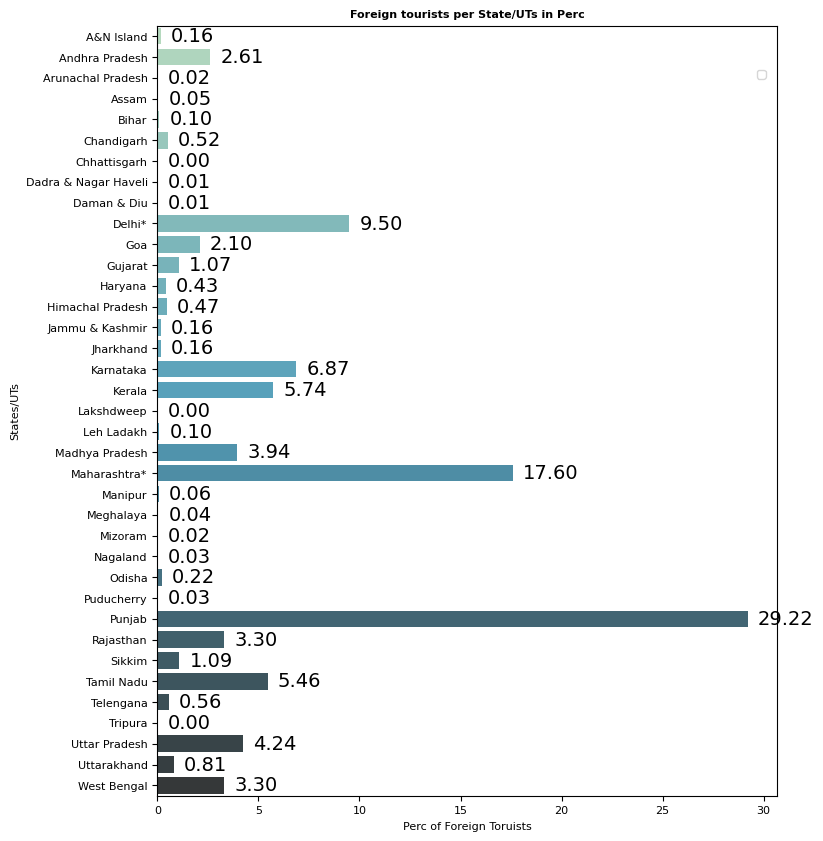

In [92]:

plt.figure(figsize=(8,10))
ax = sns.barplot(x="FTV Perc", y="States/UTs", data=statewise_data, palette='GnBu_d')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha = 'left',
            va = 'center',
            fontsize=14)

plt.title("Foreign tourists per State/UTs in Perc", fontsize=8, fontweight='bold')
plt.xlabel("Perc of Foreign Toruists", fontsize=8)
plt.ylabel("States/UTs", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 8})

plt.show()

## Tourist Places in Punjab

In [93]:
districtpunjab = districts[districts['statename'] == 'Punjab']

In [94]:
gdf3 = gpd.GeoDataFrame(districtpunjab, geometry='geometry')

In [95]:
punjab_tourists=pd.read_excel("https://github.com/HarshGujarathi7/files/raw/main/Punjab%20tourist%20places.xlsx")

In [96]:
punjab_tourists['location'] = punjab_tourists['Address'].apply(lambda addr: None)

geolocator = Nominatim(user_agent='blah@gmail.com')

for index, row in punjab_tourists.iterrows():
    location = geolocator.geocode(row['Address'])
    if location:
        punjab_tourists.at[index, 'location'] = [location.latitude, location.longitude]

In [97]:
import folium
from folium.plugins import MarkerCluster
gdf3_json = gdf3.to_crs(epsg='4326').to_json()
center_location = [gdf3.geometry.centroid.y.mean(), gdf3.geometry.centroid.x.mean()]

m = folium.Map(location=center_location,zoom_start=8)

for index, row in punjab_tourists.iterrows():
    if isinstance(row['location'], list) and len(row['location']) == 2:
        icon = folium.Icon(color='red', icon='camera', prefix='fa')
        folium.Marker(location=row['location'], popup=row['Location'], icon=icon).add_to(m)

folium.LayerControl().add_to(m)

m

<ipython-input-97-0a16908a032d>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_location = [gdf3.geometry.centroid.y.mean(), gdf3.geometry.centroid.x.mean()]


## Mineral Distribution in India

In [98]:
df=pd.read_excel("https://github.com/HarshGujarathi7/files/raw/main/minerals%20statewise.xlsx")


In [99]:
india_df=df[df["country"]=="India"]
india_df=india_df.reset_index().drop(columns=["index"])
india_df.head()
india_df["state"]=india_df['state'].replace({'Orissa': 'Odisha', 'Tamil Nadu [Madras]': 'Tamil Nadu'})

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Adilabad,22.88286,79.61656,AS,India,NaN,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,NaN,"Shale,Limestone,Chert",NaN
1,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banjari,21.88280,80.31701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,NaN,Jagantola,NaN,"Quartzite,Schist",NaN
4,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
import geopandas as geo
shp_gdf = geo.read_file('https://github.com/HarshGujarathi7/files/raw/main/India%20States/Indian_states.shp')
gdf = geo.GeoDataFrame(
    india_df.iloc[:,:5], geometry=geo.points_from_xy(india_df.iloc[:,:5].longitude, india_df.iloc[:,:5].latitude))

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Mineral ores in India (state wise)')

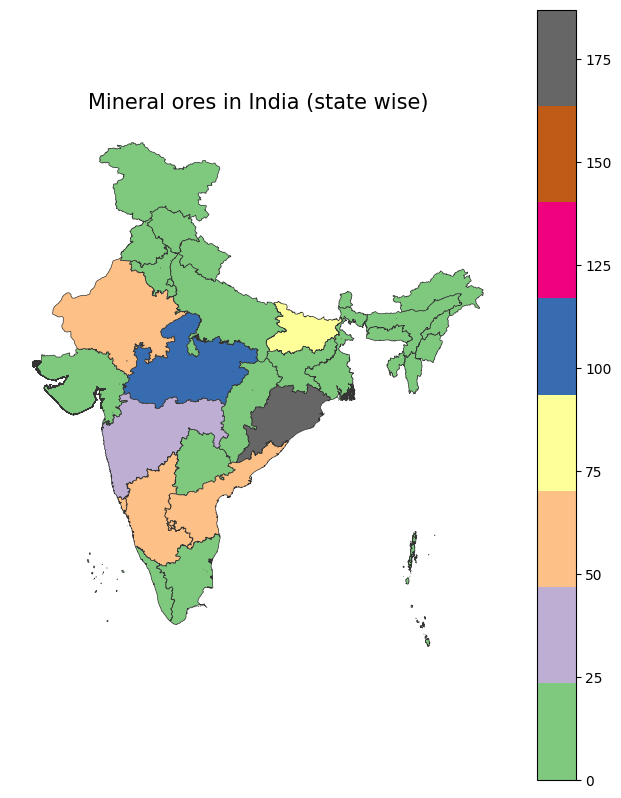

In [101]:
indian_1=india_df["state"].value_counts().to_frame()
indian_1=indian_1.reset_index().rename(columns={"index":"state","state":"mineral_ore_present"})

merged = shp_gdf.set_index('st_nm').join(indian_1.set_index('state')).fillna(0)
fig, ax = plt.subplots(1, figsize=(8, 10))
ax.axis('off')
ax.set_title('Mineral ores in India (state wise)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='mineral_ore_present', cmap='Accent', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [102]:
gdf4 = gpd.GeoDataFrame(merged, geometry='geometry')

## Tourism statistics of India from 2001 - 2022

In [103]:
worldvsindia= pd.read_csv('https://github.com/HarshGujarathi7/files/raw/main/India-Tourism-Statistics-2001-2019-worldvsindia.csv')
worldvsindia.head()

,Year,World - Number (in million),World - % Change,India - Number (in million),India - % Change,Percentage Share of India,Rank of India
0,2001,683.4,0.0,2.54,-4.2,0.37,51st
1,2002,703.2,2.9,2.38,-6.3,0.34,54th
2,2003,691.0,-1.7,2.73,14.7,0.40,51st
3,2004,762.0,10.3,3.46,26.7,0.45,44th
4,2005,803.4,5.4,3.92,13.3,0.49,43rd


In [104]:
worldvsindia_rank=worldvsindia[['Year','World - Number (in million)','India - Number (in million)','Rank of India']].copy()
worldvsindia_rank.fillna('NA',inplace=True)
worldvsindia_rank

,Year,World - Number (in million),India - Number (in million),Rank of India
0,2001,683.4,2.54,51st
1,2002,703.2,2.38,54th
2,2003,691.0,2.73,51st
3,2004,762.0,3.46,44th
4,2005,803.4,3.92,43rd
5,2006,846.6,4.45,44th
6,2007,894.0,5.08,41st
7,2008,917.0,5.28,41st
8,2009,883.0,5.17,41st
9,2010,948.0,5.78,42nd


## Co-Relation Graphs

In [105]:
alcohol.head(10)
alcohol1 = alcohol[["STATE","Usage"]]

,Code,STATE,Usage,Alcohol Dependence (%),Alcohol 'Quantum of Work' (%)
0,1,JAMMU AND KASHMIR,3.5,0.30,1.20
1,2,HIMACHAL PRADESH,8.9,0.70,1.70
2,3,PUNJAB,28.5,6.00,10.50
3,4,CHANDIGARH,17.5,1.10,4.30
4,5,UTTARAKHAND,18.8,1.60,4.20
5,6,HARYANA,21.6,2.70,4.40
6,7,DELHI,21.3,2.40,6.20
7,8,RAJASTHAN,2.1,0.70,1.20
8,9,UTTAR PRADESH,23.8,4.40,9.00
9,10,BIHAR,0.9,0.15,0.16


In [110]:
states.columns

Index(['statename', 'geometry', 'objectid', 'distarea', 'totalpopul',
       'totalhh', 'totpopmale', 'totpopfema', 'st_areasha', 'st_lengths'],
      dtype='object')

In [111]:
states.rename(columns={'statename': 'STATE'}, inplace=True)

In [112]:
states['STATE'] = states['STATE'].str.upper()

In [114]:
alcohol_pop = alcohol.merge(states, on ="STATE")
alcohol_pop.columns

Index(['Code', 'STATE', 'Usage', 'Alcohol Dependence (%)',
       'Alcohol 'Quantum of Work' (%)', 'geometry', 'objectid', 'distarea',
       'totalpopul', 'totalhh', 'totpopmale', 'totpopfema', 'st_areasha',
       'st_lengths'],
      dtype='object')

In [115]:
alcohol_pop["total_drug_use"] = (alcohol_pop["Usage"] / 100) * alcohol_pop["totalpopul"]


In [116]:
alcohol_pop_copu = alcohol_pop.drop(columns=['geometry'])


In [117]:
alcohol_pop_copu.head(40)

,Code,STATE,Usage,Alcohol Dependence (%),Alcohol 'Quantum of Work' (%),objectid,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,total_drug_use
0,2,HIMACHAL PRADESH,8.9,0.70,1.70,234,55673.000000,6.864602e+06,1.483280e+06,3.481873e+06,3.382729e+06,7.762950e+10,5.764356e+06,6.109496e+05
1,3,PUNJAB,28.5,6.00,10.50,6344,60053.449921,3.141082e+07,6.268772e+06,1.652729e+07,1.488353e+07,6.875307e+10,8.565756e+06,8.952084e+06
2,4,CHANDIGARH,17.5,1.10,4.30,272,114.000000,1.055450e+06,2.411730e+05,5.806630e+05,4.747870e+05,1.548992e+08,8.160654e+04,1.847038e+05
3,5,UTTARAKHAND,18.8,1.60,4.20,91,53483.000000,1.008629e+07,2.056975e+06,5.137773e+06,4.948519e+06,7.136755e+10,6.733584e+06,1.896223e+06
4,6,HARYANA,21.6,2.70,4.40,5535,44212.000000,2.535146e+07,4.857524e+06,1.349473e+07,1.185673e+07,5.813073e+10,7.591459e+06,5.475916e+06
5,8,RAJASTHAN,2.1,0.70,1.20,18528,342239.000000,6.854844e+07,1.271115e+07,3.555100e+07,3.299744e+07,4.299271e+11,2.530058e+07,1.439517e+06
6,9,UTTAR PRADESH,23.8,4.40,9.00,45371,260310.899841,2.071473e+08,3.495944e+07,1.082562e+08,9.889115e+07,3.047078e+11,3.279848e+07,4.930106e+07
7,10,BIHAR,0.9,0.15,0.16,8564,94163.000000,1.040995e+08,1.891356e+07,5.427816e+07,4.982130e+07,1.162797e+11,1.513304e+07,9.368951e+05
8,11,SIKKIM,15.7,3.60,5.00,666,7096.000000,6.105770e+05,1.290060e+05,3.230700e+05,2.875070e+05,9.129413e+09,9.128802e+05,9.586059e+04
9,12,ARUNACHAL PRADESH,28.0,72.00,10.20,6584,83743.000000,1.383727e+06,2.705770e+05,7.139120e+05,6.698150e+05,1.053274e+11,7.906259e+06,3.874436e+05


In [118]:
merged_data = crime_pop.merge(income, on='STATE').merge(alcohol_pop_copu, on='STATE')
selected_columns = merged_data[['TOTAL  CRIMES', 'Income', 'total_drug_use',]]
selected_columns.rename(columns={'TOTAL  CRIMES': 'Crime'}, inplace=True)
selected_columns.rename(columns={'Income': 'Income'}, inplace=True)
selected_columns.rename(columns={'total_drug_use': 'Drug_Usage'}, inplace=True)
corr_matrix = selected_columns.corr()

<ipython-input-118-9204e6bd25f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.rename(columns={'TOTAL  CRIMES': 'Crime'}, inplace=True)
<ipython-input-118-9204e6bd25f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.rename(columns={'Income': 'Income'}, inplace=True)
<ipython-input-118-9204e6bd25f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.rename(columns={'total_drug_use': 

<ipython-input-119-1d08b53def30>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(corr_matrix.columns), rotation=45)
<ipython-input-119-1d08b53def30>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(corr_matrix.index))


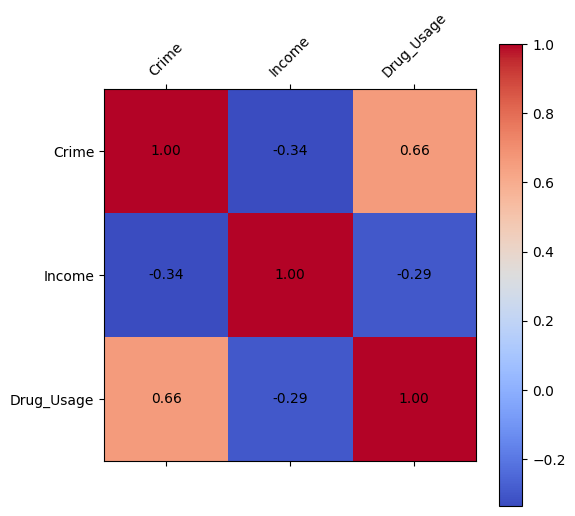

In [119]:
def display_corr_matrix():
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(corr_matrix, cmap='coolwarm')

    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

    plt.colorbar(cax)
    ax.set_xticklabels([''] + list(corr_matrix.columns), rotation=45)
    ax.set_yticklabels([''] + list(corr_matrix.index))
    plt.show()
# Display the correlation matrix plot with values inside the boxes
display_corr_matrix()

1. Crime and Drug Usage has a positive co relationship (0.66)  
2. Income and Crime has negative co-relationship (-0.34)
3. Income and Drug usage hass a negative co-relationship (-0.29)

In [120]:
druggoa= drug1[drug1['STATE'] == 'GOA']
crimegoa = crime1[crime1['STATE'] == 'GOA']
incomegoa = income1[income1['STATE'] == 'GOA']

In [121]:
incomegoa.columns

Index([   'STATE',       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013,       2014,       2015,       2016,       2017,       2018,
             2019,   'income',       2021,       2022, 'CATEGORY'],
      dtype='object')

In [122]:
norm_c_i = pd.DataFrame()
norm_c_i["crime"] = (crime1['TOTAL  CRIMES'] - crime1['TOTAL  CRIMES'].min()) / (crime1['TOTAL  CRIMES'].max() - crime1['TOTAL  CRIMES'].min())
norm_c_i['income'] = (income1['income'] - income1['income'].min()) / (income1['income'].max() - income1['income'].min())
norm_c_i["STATE"] = income1["STATE"]


In [123]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have already defined the DataFrame norm_c_i

fig = go.Figure()

fig1=fig.add_trace(go.Scatter(x=norm_c_i['STATE'], y=norm_c_i['crime'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig1=fig.add_trace(go.Scatter(x=norm_c_i['STATE'], y=norm_c_i['income'], mode='lines', name='income', line=dict(color='#D11E5D')))

# Highlight points for "Goa" and "Uttar Pradesh"
highlight_states = ["GOA", "UTTAR PRADESH"]
highlight_indices = norm_c_i[norm_c_i["STATE"].isin(highlight_states)].index

fig2=fig1.add_trace(go.Scatter(
    x=norm_c_i['STATE'].iloc[highlight_indices],
    y=norm_c_i['crime'].iloc[highlight_indices],
    mode='markers',
    marker=dict(color='#53D1BA', size=10),
    name='Highlighted States (Crime)'
))

fig2=fig1.add_trace(go.Scatter(
    x=norm_c_i['STATE'].iloc[highlight_indices],
    y=norm_c_i['income'].iloc[highlight_indices],
    mode='markers',
    marker=dict(color='#D11E5D', size=10),
    name='Highlighted States (Income)'
))

fig3=fig2.update_layout(
    title='Crime vs Income',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized income per capita', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark'
)

fig3.show()


In [124]:
norm_c_d = pd.DataFrame()
norm_c_d["crime"] = (crime1['TOTAL  CRIMES'] - crime1['TOTAL  CRIMES'].min()) / (crime1['TOTAL  CRIMES'].max() - crime1['TOTAL  CRIMES'].min())
norm_c_d['drug_perc'] = (alcohol['Usage'] - alcohol['Usage'].min()) / (alcohol['Usage'].max() - alcohol['Usage'].min())
norm_c_d["STATE"] = crime1["STATE"]

In [125]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have already defined the DataFrame norm_c_i

fig = go.Figure()

fig1=fig.add_trace(go.Scatter(x=norm_c_d['STATE'], y=norm_c_d['crime'], mode='lines', name='crime', line=dict(color='#53D1BA')))
fig1=fig.add_trace(go.Scatter(x=norm_c_d['STATE'], y=norm_c_d['drug_perc'], mode='lines', name='drug usage perc', line=dict(color='#D11E5D')))

fig2 = fig1.update_layout(
    title='crime vs drug Usage Perc',
    xaxis=dict(title='States in India'),
    yaxis=dict(title='Normalized Value'),
    yaxis2=dict(title='Normalized Drug usage perc', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.15, orientation='h'),
    template='plotly_dark')

fig2.show()

In [127]:
stat_india =pd.read_csv('https://github.com/HarshGujarathi7/files/raw/main/RBI%20DATA%20states_wise_population_Income.csv')

In [132]:
stat_india.columns

Index(['States_Union Territories', '2000-01-INC', '2011-12-INC', '2001 - LIT',
       '2011- LIT', '2001 - POP', '2011- POP', '2001 -SEX_Ratio',
       '2011 -SEX_Ratio', '2001 -UNEMP', '2011 -UNEMP', '2001 -Poverty',
       '2011 -Poverty'],
      dtype='object')

In [155]:
stat_india.rename(columns= {'States_Union Territories' : 'STATE'}, inplace=True)
stat_india['STATE'] = stat_india['STATE'].str.upper()

In [163]:
stat_india.loc[stat_india['STATE'] == 'JAMMU AND KASHMIR', 'STATE'] = 'JAMMU & KASHMIR'
stat_india.loc[stat_india['STATE'] == 'CHHATTISHGARH', 'STATE'] = 'CHHATISGARH'
stat_india.loc[stat_india['STATE'] == 'TAMILNADU', 'STATE'] = 'TAMIL NADU'
stat_india.loc[stat_india['STATE'] == 'ANDAMAN & NICOBAR', 'STATE'] = 'ANDAMAN & NICOBAR ISLANDS'
stat_india.loc[stat_india['STATE'] == 'DELHI', 'STATE'] = 'NCT OF DELHI'
stat_india.loc[stat_india['STATE'] == 'ODISHA', 'STATE'] = 'ORISSA'
stat_india.loc[stat_india['STATE'] == 'PUDUCHERRY', 'STATE'] = 'PONDICHERRY'

In [164]:
sta_Ind = stat_india.merge(states, on ="STATE",how='outer')

In [165]:
df_scat = pd.DataFrame()

In [192]:
df_scat['crime'] = crime1["TOTAL  CRIMES"]
df_scat['drug_usage'] = alcohol['Usage']
df_scat['income'] = income1["income"]
df_scat['Literacy_rate'] = sta_Ind["2001 - LIT"]
df_scat['Unemployement_rate'] = sta_Ind["2001 -UNEMP"]
df_scat['Poverty_rate'] = sta_Ind["2001 -Poverty"]
df_scat['States'] = crime1["STATE"]

In [193]:
df_scat["crime_by_pop"] = (df_scat["crime"] / 10) /alcohol_pop["totalpopul"]

In [194]:
df_scat.columns

Index(['crime', 'drug_usage', 'income', 'Literacy_rate', 'Unemployement_rate',
       'Poverty_rate', 'States', 'crime_by_pop'],
      dtype='object')

In [195]:
px.scatter(df_scat, x="States", y="drug_usage", color="income",
                  hover_data=['crime_by_pop'],width=1000,height=600)

In [197]:
pip install mplcursors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21168 sha256=bdca7f4fb7162ac140c7cf6875da4f9855ef13a2e661b170f7fb65782d47b2fb
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'States')

Text(0, 0.5, 'Factors')

Text(0.5, 1.0, 'States vs Unemployment Rate, Literacy Rate, and Poverty Rate')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'ANDAMAN & NICOBAR'),
  Text(1, 0, 'ANDHRA PRADESH'),
  Text(2, 0, 'ARUNACHAL PRADESH'),
  Text(3, 0, 'ASSAM'),
  Text(4, 0, 'BIHAR'),
  Text(5, 0, 'CHANDIGARH'),
  Text(6, 0, 'CHHATTISHGARH'),
  Text(7, 0, 'DELHI'),
  Text(8, 0, 'GOA'),
  Text(9, 0, 'GUJARAT'),
  Text(10, 0, 'HARYANA'),
  Text(11, 0, 'HIMACHAL PRADESH'),
  Text(12, 0, 'JAMMU AND KASHMIR'),
  Text(13, 0, 'JHARKHAND'),
  Text(14, 0, 'KARNATAKA'),
  Text(15, 0, 'KERALA'),
  Text(16, 0, 'LAKSHADWEEP'),
  Text(17, 0, 'MADHYA PRADESH'),
  Text(18, 0, 'MAHARASHTRA'),
  Text(19, 0, 'MANIPUR'),
  Text(20, 0, 'MEGHALAYA'),
  Text(21, 0, 'MIZORAM'),
  Text(22, 0, 'NAGALAND'),
  Text(23, 0, 'ODISHA'),
  Text(24, 0, 'PUDUCHERRY'),
  Text(25, 0, 'PUNJAB'),
  Text(26, 0, 'RAJASTHAN'),
  Text(27, 0, 'SIKKIM'),
  Text(

<function __main__.<lambda>(sel)>

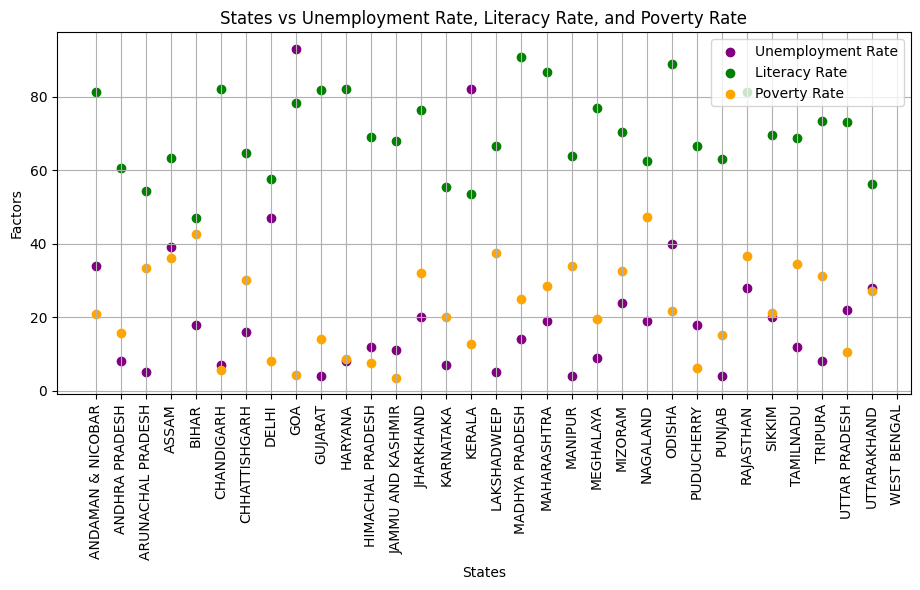

In [199]:
import matplotlib.pyplot as plt
import mplcursors

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 2)
plt.scatter(df_scat['States'], df_scat['Unemployement_rate'], c='purple', label='Unemployment Rate')
plt.scatter(df_scat['States'], df_scat['Literacy_rate'], c='green', label='Literacy Rate')
plt.scatter(df_scat['States'], df_scat['Poverty_rate'], c='orange', label='Poverty Rate')
plt.xlabel('States')
plt.ylabel('Factors')
plt.title('States vs Unemployment Rate, Literacy Rate, and Poverty Rate')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)

mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.tight_layout()
plt.show()


## Goa and UP District and Sub District

In [200]:
! wget -q -O Goa.zip https://github.com/HarshGujarathi7/files/raw/main/nyu_2451_42190.zip
zip_ref = zipfile.ZipFile('Goa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
goa=gpd.read_file("nyu_2451_42190/india-village-census-2001-GA.shp")





In [201]:
districtup = districts[districts['statename'] == 'Uttar Pradesh']
districtup.describe()
districtup.rename(columns= {'statename' : 'STATE'}, inplace=True)
districtup['STATE'] = districtup['STATE'].str.upper()
districtup.rename(columns= {'distname' : 'DISTRICT'}, inplace=True)
districtup['DISTRICT'] = districtup['DISTRICT'].str.upper()

,objectid,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths
count,75.000000,75.000000,7.500000e+01,75.000000,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01
mean,604.946667,3470.811998,2.761964e+06,466125.834020,1.443415e+06,1.318549e+06,4.062770e+09,4.373131e+05
std,23.296499,1373.458631,1.166069e+06,195753.468988,6.076177e+05,5.606532e+05,1.692628e+09,1.380117e+05
min,564.000000,1015.000000,8.759580e+05,158435.000000,4.663580e+05,4.096000e+05,1.239416e+09,2.291357e+05
25%,586.500000,2387.000000,1.816576e+06,314272.500000,9.439114e+05,8.603395e+05,3.025727e+09,3.434778e+05
50%,605.000000,3349.000000,2.498156e+06,414266.000000,1.312302e+06,1.209192e+06,3.706448e+09,4.189888e+05
75%,623.500000,4422.000000,3.647078e+06,607562.500000,1.884830e+06,1.734191e+06,5.107024e+09,5.185968e+05
max,656.000000,7680.000000,5.954391e+06,976733.000000,3.131807e+06,2.822584e+06,9.934774e+09,1.039938e+06


<ipython-input-201-9b992ad58e82>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-201-9b992ad58e82>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A 

In [202]:
districtup.columns

Index(['objectid', 'statecode', 'STATE', 'state_ut', 'distcode', 'DISTRICT',
       'distarea', 'totalpopul', 'totalhh', 'totpopmale', 'totpopfema',
       'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [203]:
!pip install pyproj


In [204]:
gdf = gpd.read_file('https://github.com/HarshGujarathi7/files/raw/main/uttarpradesh_district.json')
gdf.to_file('output.shp')

In [205]:
up1=gpd.read_file("/content/output.shx")

In [206]:
up1.rename(columns= {'district' : 'DISTRICT'}, inplace=True)
up1['STATE'] = up1['DISTRICT'].str.upper()


In [207]:
up1.columns

Index(['unique_id', 'DISTRICT', 'state', 'ST_CEN_CD', 'DT_CEN_CD',
       'censuscode', 'geometry', 'STATE'],
      dtype='object')

In [208]:
districtup1=districtup[['DISTRICT','totalpopul']]

districtup1.head(5)

,DISTRICT,totalpopul
78,AMBEDKAR NAGAR,2397888.0
79,BALLIA,3239774.0
80,KANPUR NAGAR,4581268.0
81,SANT RAVIDAS NAGAR (BHADOHI),1578213.0
243,SIDDHARTHNAGAR,2559297.0


<Axes: >

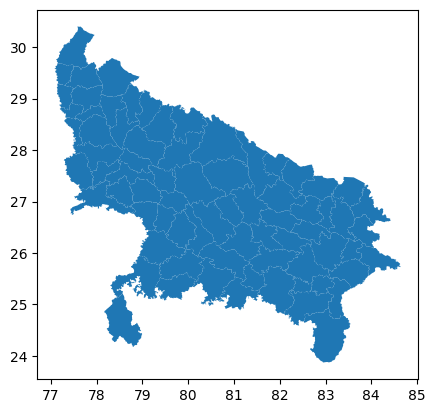

In [209]:
districtup.plot()

In [210]:
upcrime = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/UP_crime.xlsx')
upcrime.columns

Index(['ndex', 'STATE', 'DISTRICT', 'THEFT', 'RIOTS', 'DACOITY',
       'DOWRY DEATHS', 'RAPE', 'MURDER', 'KIDNAPPING AND ABDUCTION', 'ROBBERY',
       'ASSAULT ON WOMEN', 'TOTAL CRIMES'],
      dtype='object')

In [211]:
CUP1 = pd.merge(districtup, upcrime, on='DISTRICT',how='outer',indicator=True)

In [212]:
CUP1.columns

Index(['objectid', 'statecode', 'STATE_x', 'state_ut', 'distcode', 'DISTRICT',
       'distarea', 'totalpopul', 'totalhh', 'totpopmale', 'totpopfema',
       'st_areasha', 'st_lengths', 'geometry', 'ndex', 'STATE_y', 'THEFT',
       'RIOTS', 'DACOITY', 'DOWRY DEATHS', 'RAPE', 'MURDER',
       'KIDNAPPING AND ABDUCTION', 'ROBBERY', 'ASSAULT ON WOMEN',
       'TOTAL CRIMES', '_merge'],
      dtype='object')

In [213]:
invalid_geometries = CUP1[~CUP1['geometry'].is_valid]
print("Number of invalid geometries:", len(invalid_geometries))

Number of invalid geometries: 0


<Axes: >

Text(0.5, 1.0, 'Total Crime in Uttar Pradesh district wise')

[]

[]

Text(0.5, 186.53447013850024, '')

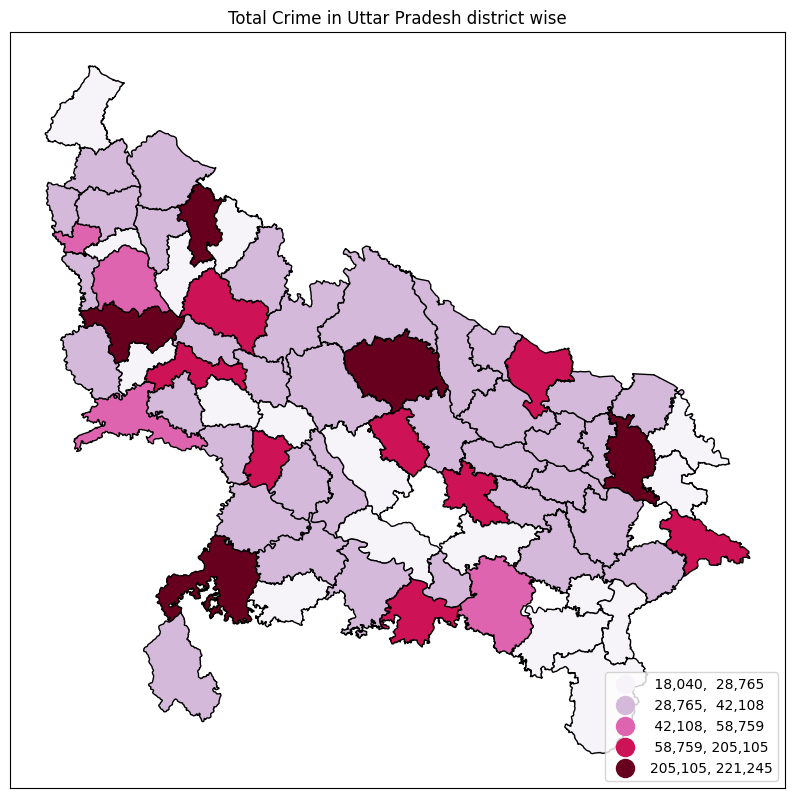

In [214]:
fig, ax = plt.subplots(1, figsize=(10, 12))
CUP1.plot(ax=ax, column='TOTAL CRIMES', legend=True, cmap='PuRd',
           scheme='Natural_Breaks', k=5, edgecolor='black', linewidth=1.0,
           legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('')
ax.set_title('Total Crime in Uttar Pradesh district wise')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')



In [215]:
min_crime = CUP1['TOTAL CRIMES'].idxmin()
max_crime = CUP1['TOTAL CRIMES'].idxmax()


district_with_min_crime = CUP1.loc[min_crime, 'DISTRICT']
min_crime_value = CUP1.loc[min_crime, 'TOTAL CRIMES']
district_with_max_crime = CUP1.loc[max_crime, 'DISTRICT']
max_crime_value = CUP1.loc[max_crime, 'TOTAL CRIMES']

print("District with minimum Crime:", district_with_min_crime)
print("Minimum crime value:", min_crime_value)
print("District with max Crime:", district_with_max_crime)
print("Max crime value:", max_crime_value)

District with minimum Crime: SAHARANPUR
Minimum crime value: 18040.0
District with max Crime: SITAPUR
Max crime value: 221245.0


### GOA -DISTRICT WISE INCOME

In [216]:
districtgoa = districts[districts['statename'] == 'Goa']
districtgoa.rename(columns= {'statename' : 'STATE'}, inplace=True)
districtgoa['STATE'] = districtgoa['STATE'].str.upper()
districtgoa.rename(columns= {'distname' : 'DISTRICT'}, inplace=True)
districtgoa['DISTRICT'] = districtgoa['DISTRICT'].str.upper()


<ipython-input-216-b079d2c98933>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-216-b079d2c98933>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A 

In [217]:
districtgoa.columns

Index(['objectid', 'statecode', 'STATE', 'state_ut', 'distcode', 'DISTRICT',
       'distarea', 'totalpopul', 'totalhh', 'totpopmale', 'totpopfema',
       'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

<Axes: >

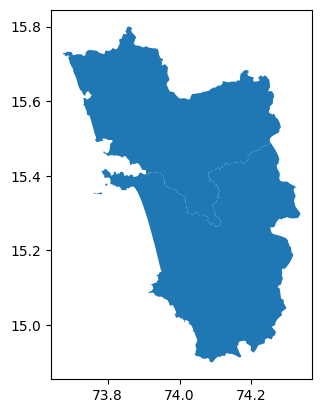

In [218]:
districtgoa.plot()

In [219]:

districtgoa['Income per capita'] = 0

districtgoa.loc[districtgoa['DISTRICT'] == 'NORTH GOA', 'Income per capita'] = 58000
districtgoa.loc[districtgoa['DISTRICT'] == 'SOUTH GOA', 'Income per capita'] = 40374


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [220]:
goaincome = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/goa_district_income.xlsx')
goaincome.columns

Index(['DISTRICT', 'Income per capita', 'Population'], dtype='object')

In [221]:
goaincome.head(10)

,DISTRICT,Income per capita,Population
0,NORTH GOA,58000,853591
1,SOUTH GOA,40374,668400


In [222]:

GI = pd.merge(goaincome, districtgoa, on='DISTRICT',how='outer',indicator=True)

In [223]:
GI.columns

Index(['DISTRICT', 'Income per capita_x', 'Population', 'objectid',
       'statecode', 'STATE', 'state_ut', 'distcode', 'distarea', 'totalpopul',
       'totalhh', 'totpopmale', 'totpopfema', 'st_areasha', 'st_lengths',
       'geometry', 'Income per capita_y', '_merge'],
      dtype='object')

In [224]:
GI1 = GI[['DISTRICT','Income per capita_x','totalpopul','geometry']]

In [225]:
from shapely.geometry import Polygon
import pandas as pd
invalid_geometries = GI[~GI['geometry'].apply(lambda x: x.is_valid)]

print("Number of invalid geometries:", len(invalid_geometries))



Number of invalid geometries: 0


<Axes: >

Text(0.5, 1.0, 'Income Per Capita of Goa Districs')

[]

[]

Text(0.5, 80.7222222222222, '')

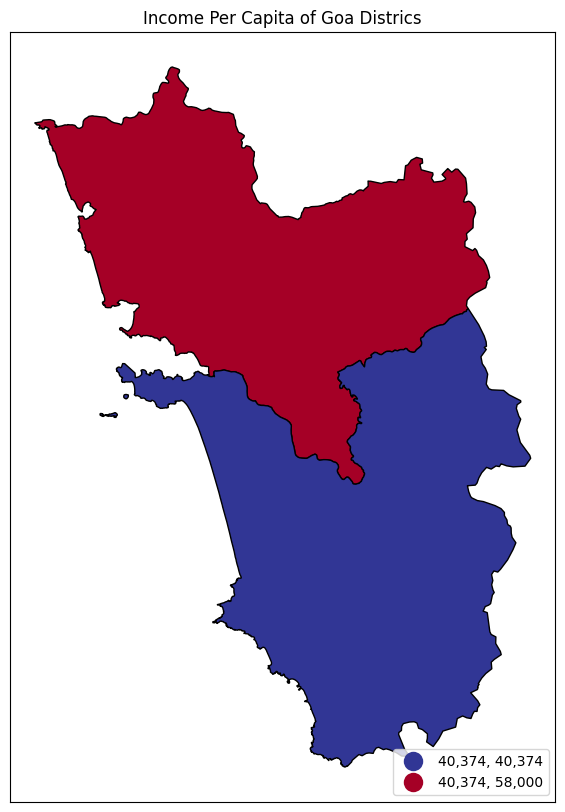

In [226]:
fig, ax = plt.subplots(1, figsize=(8, 10))
districtgoa.plot(ax=ax, column='Income per capita', legend=True, cmap='RdYlBu_r',
           scheme='Natural_Breaks', k=2, edgecolor='black', linewidth=1.0,
           legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('')
ax.set_title('Income Per Capita of Goa Districs')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')


In [227]:
import geopandas as gpd
from shapely.geometry import Polygon

gdf2 = gpd.GeoDataFrame(districtgoa, geometry='geometry')

In [228]:

# import folium
# from folium.plugins import MarkerCluster

# gdf2_json = gdf2.to_crs(epsg='4326').to_json()

# center_location = [gdf2.geometry.centroid.y.mean(), gdf2.geometry.centroid.x.mean()]
# m = folium.Map(location=center_location,zoom_start=10)

# choropleth_layer = folium.Choropleth(
#     geo_data=gdf2_json,
#     name='choropleth',
#     data=gdf2,
#     columns=['totalpopul','Income per capita'],
#     key_on='feature.properties.totalpopul',
#     fill_color='PuRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Income District Wise',
#     highlight=True,
#     line_color='black',
#     line_weight=1.0
# ).add_to(m)

# category_icons = {
#     'Tourist Attraction': 'star',
#     'Tourist attraction': 'star',
#     'Hindu temple': 'university',
#     'Church': 'church',
#     'Boat rental service': 'ship',
#     'Catholic church': 'church',
#     'Swimming lake': 'swimmer',
#     'Amusement park': 'ferris-wheel',
#     'Public beach': 'umbrella-beach',
#     'Convent': 'church',
#     'Historical landmark': 'landmark',
#     'Hindu Temple': 'university',
#     'Museum': 'museum',
#     'Fortress': 'shield-alt',
#     'Cruise agency': 'ship',
#     'Fast Food Restaurant': 'hamburger',
#     'Casino': 'dice',
#     'Mosque': 'mosque',
#     'Bird watching area': 'crow',
#     'Wax museum': 'candle-holder',
#     'Scenic spot': 'binoculars',
#     'Nature preserve': 'tree',
#     'Park': 'tree',
#     'Water park': 'swimming-pool',
#     'Ashram': 'university',
#     'Art center': 'palette',
#     'Campground': 'campground',
#     'Aquarium': 'fish',
#     'Hotel': 'hotel',
#     'Bridge': 'bridge',
#     'City park': 'tree',
#     'Chapel': 'church',
#     'Wildlife refuge': 'tree',
#     'Picnic ground': 'utensils',
#     'Beach pavilion': 'umbrella-beach',
#     'Tour operator': 'binoculars',
#     'Tour Operator': 'binoculars',
#     'Travel Agency': 'suitcase',
#     'Taxi Service': 'taxi',
#     'Event Venue': 'calendar',
#     'Car Rental Agency': 'car',
#     'Travel agency': 'suitcase',
# }

# marker_cluster = MarkerCluster().add_to(m)

# def get_icon(main_category):
#     return category_icons.get(main_category, 'question')

# for index, row in ind_tourists1.iterrows():
#     if pd.notna(row['latitude']) and pd.notna(row['longitude']):
#         main_category_icon = get_icon(row['main_category'])
#         icon = folium.Icon(color='red', icon=main_category_icon, prefix='fa')
#         folium.Marker(location=[row['latitude'], row['longitude']], popup=row['poi_name'], icon=icon).add_to(marker_cluster)

# folium.LayerControl().add_to(m)
# m


<Figure size 1600x800 with 0 Axes>

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of tourists (in million)'),
 Text(0.5, 1.0, 'Indian Tourism rank in the world [2001-2022]')]

([<matplotlib.axis.XTick at 0x7d9519eeda20>,
 [Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

Text(2001, 3.04, '51st')

Text(2002, 2.88, '54th')

Text(2003, 3.23, '51st')

Text(2004, 3.96, '44th')

Text(2005, 4.42, '43rd')

Text(2006, 4.95, '44th')

Text(2007, 5.58, '41st')

Text(2008, 5.78, '41st')

Text(2009, 5.67, '41st')

Text(2010, 6.28, '42nd')

Text(2011, 6.81, '38th')

Text(2012, 7.08, '41st')

Text(2013, 7.47, '41st')

Text(2014, 13.61, '24th')

Text(2015, 14.27, '24th')

Text(2016, 15.52, '26th')

Text(2017, 17.31, '26th')

Text(2018, 17.92, '22nd')

Text(2019, 18.41, '22nd')

Text(2020, 18.7, '19th')

Text(2021, 19.0, '18th')

[]

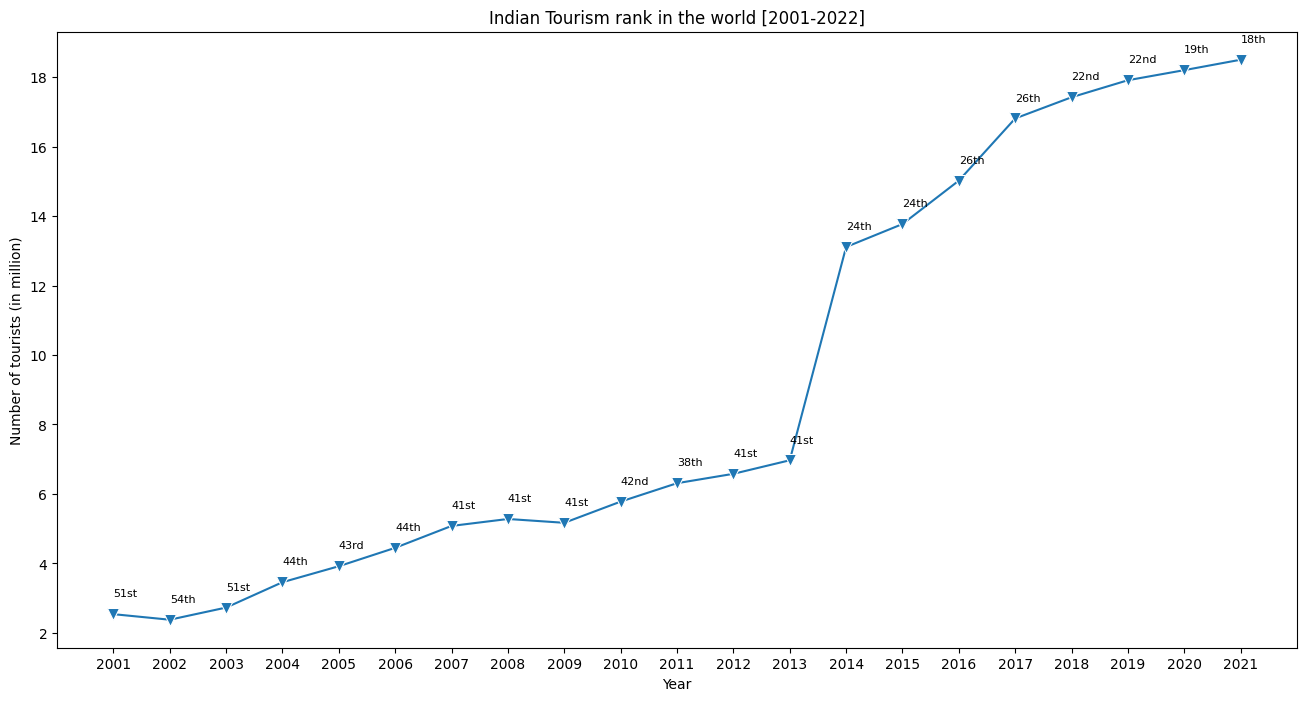

In [229]:

plt.figure(figsize=(16,8))

g=sns.lineplot(x='Year', y='India - Number (in million)', data=worldvsindia_rank, marker= 'v', markersize=8)
g.set(xlabel="Year",ylabel="Number of tourists (in million)", title="Indian Tourism rank in the world [2001-2022]")

plt.xticks(
    range(2001,2022),
    fontweight='light'
)

for x,index in zip(g.get_xticks(),worldvsindia_rank.index):
    g.text(x,worldvsindia_rank._get_value(index,'India - Number (in million)')+0.5, worldvsindia_rank._get_value(index,'Rank of India'),size=8)

plt.plot()

## Conclusion

In my project, I discovered significant positive relationships among **Income, Crime, and Drug usage** in various Indian states:

**Uttar Pradesh**: Exhibits high crime rates, low income, and a notable drug usage percentage.

**Goa**: Stands out with high income, low crime rates, but also faces a challenge with a high drug usage percentage.

Interestingly, Punjab, despite attracting the highest number of foreign tourists, doesn't reflect a proportionately high income per capita. In contrast, Goa, with moderate foreign tourism, boasts a high income per capita due to its smaller population and substantial mineral exports.

Moving forward, I plan to delve deeper into district-level analysis and explore the global tourism landscape. The aim is to compare tourism dynamics with different countries and identify key contributors to India's tourism sector.